# *First stage: Debugging*
The goal is to figure out what attributes are related on the price of dwelling and then select them as imput values in the next stage.    

In [1]:
#Edit the color of text in print()
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### Downloading datasets

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample_submission=pd.read_csv('sample_submission.csv')

In [4]:
f,c =train.shape
print(color.BOLD +'train:'+ color.END,'{0} raws and {1} columns'.format(f,c))
f,c = test.shape
print(color.BOLD+'test:'+ color.END, '{0} raws and {1} columns'.format(f,c))
f,c = sample_submission.shape
print(color.BOLD+'sample_submission:'+ color.END,'{0} raws and {1} columns'.format(f,c))

train: 1460 raws and 81 columns
test: 1459 raws and 80 columns
sample_submission: 1459 raws and 2 columns


### Looking at the glimpse of data

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
sample_submission.columns

Index(['Id', 'SalePrice'], dtype='object')

Looking at the attributes with missing values

In [8]:
train.isnull().any()[train.isnull().any()== True].index 

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [9]:
test.isnull().any()[test.isnull().any()==True].index

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [10]:
sample_submission.isnull().any()[sample_submission.isnull().any()==True].index

Index([], dtype='object')

In [11]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [12]:
sample_submission.dtypes

Id             int64
SalePrice    float64
dtype: object

To avoid warnings

In [13]:
import warnings
warnings.filterwarnings('ignore')

To tranform categorical values into numerical values:

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

Defining the list `attrs` that will store the attributes to be taken into account in the next step:

In [15]:
attrs=[]

A sub program that calculates the correlation of every attribute with `SalePrice`:

In [16]:
def corr(attribute):
    df= train[[attribute,'SalePrice']]
    if df[attribute].dtype == 'object':
        df[attribute]=le.fit_transform(df[attribute])
    corr=df.corr().iloc[0,1]
    print(color.PURPLE+ 'CORRELATION:'+ color.END)
    print('{0} and SalePrice: {1}'.format(attribute,round(corr,2)))
    if abs(corr) >= 0.55:#collecting only those ones whose correlation coeficient in absolute valor is equals or higher than 0.55
        if attribute not in attrs:
            attrs.append(attribute)
        print(color.GREEN + color.BOLD + '\n{} will be taken into account!!'.format(attribute)+ color.END)
    else:
        print(color.RED + color.BOLD + color.UNDERLINE+"\n{} won't be taken into account".format(attribute)+ color.END)

## Attributes:

In [17]:
for i,attribute in enumerate(train.columns.tolist(),start=1):
    print(color.BLUE+color.BOLD +'{0}.{1}'.format(i,attribute)+color.END)

1.Id
2.MSSubClass
3.MSZoning
4.LotFrontage
5.LotArea
6.Street
7.Alley
8.LotShape
9.LandContour
10.Utilities
11.LotConfig
12.LandSlope
13.Neighborhood
14.Condition1
15.Condition2
16.BldgType
17.HouseStyle
18.OverallQual
19.OverallCond
20.YearBuilt
21.YearRemodAdd
22.RoofStyle
23.RoofMatl
24.Exterior1st
25.Exterior2nd
26.MasVnrType
27.MasVnrArea
28.ExterQual
29.ExterCond
30.Foundation
31.BsmtQual
32.BsmtCond
33.BsmtExposure
34.BsmtFinType1
35.BsmtFinSF1
36.BsmtFinType2
37.BsmtFinSF2
38.BsmtUnfSF
39.TotalBsmtSF
40.Heating
41.HeatingQC
42.CentralAir
43.Electrical
44.1stFlrSF
45.2ndFlrSF
46.LowQualFinSF
47.GrLivArea
48.BsmtFullBath
49.BsmtHalfBath
50.FullBath
51.HalfBath
52.BedroomAbvGr
53.KitchenAbvGr
54.KitchenQual
55.TotRmsAbvGrd
56.Functional
57.Fireplaces
58.FireplaceQu
59.GarageType
60.GarageYrBlt
61.GarageFinish
62.GarageCars
63.GarageArea
64.GarageQual
65.GarageCond
66.PavedDrive
67.WoodDeckSF
68.OpenPorchSF
69.EnclosedPorch
70.3SsnPorch
71.ScreenPorch
72.PoolArea
73.PoolQC
74.Fence

#### 1.Id
*Number of row.*

**Id won't be taken into account.**
<br>

#### 2.MSSubClass
*Identifies the type of dwelling involved in the sale.*	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

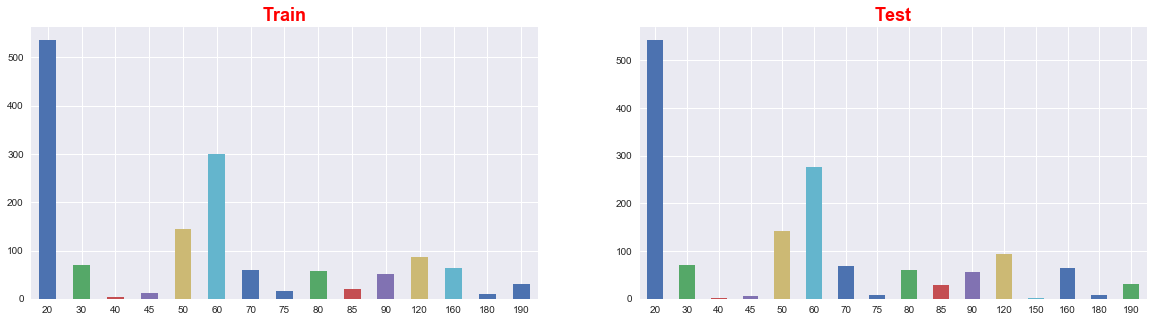

In [18]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.MSSubClass.value_counts(dropna=False,sort=False).plot.bar(ax=ax1,rot=0)
test.MSSubClass.value_counts(dropna=False,sort=False).plot.bar(ax=ax2,rot=0)
plt.show()

In [19]:
corr('MSSubClass')

CORRELATION:
MSSubClass and SalePrice: -0.08

MSSubClass won't be taken into account


#### 3.MSZoning
*Identifies the general zoning classification of the sale.*
		
       A	 Agriculture
       C	 Commercial
       FV	Floating Village Residential
       I	 Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

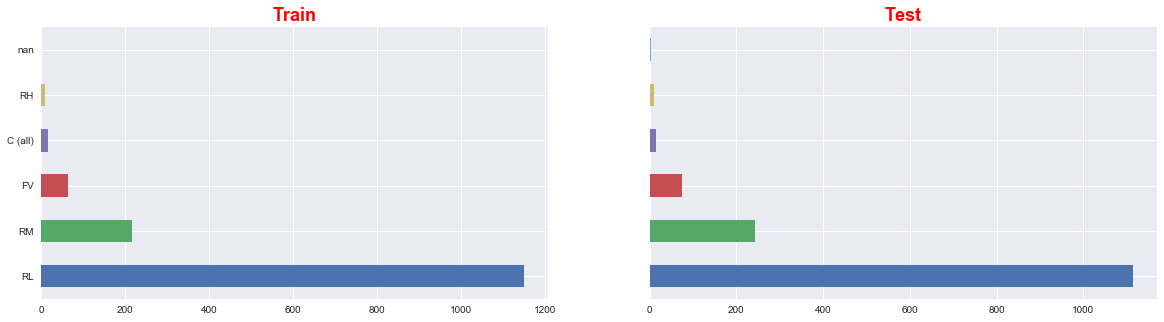

In [20]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.MSZoning.value_counts(dropna=False).plot.barh(ax=ax1)
test.MSZoning.value_counts(dropna=False).plot.barh(ax=ax2)
plt.show()

Replacing NaN values with the mode:

In [21]:
train.MSZoning.fillna(train.MSZoning.mode().iloc[0],inplace=True)
test.MSZoning.fillna(train.MSZoning.mode().iloc[0],inplace=True)

In [22]:
corr('MSZoning')

CORRELATION:
MSZoning and SalePrice: -0.17

MSZoning won't be taken into account


#### 4.LotFrontage
*Linear feet of street connected to property.*

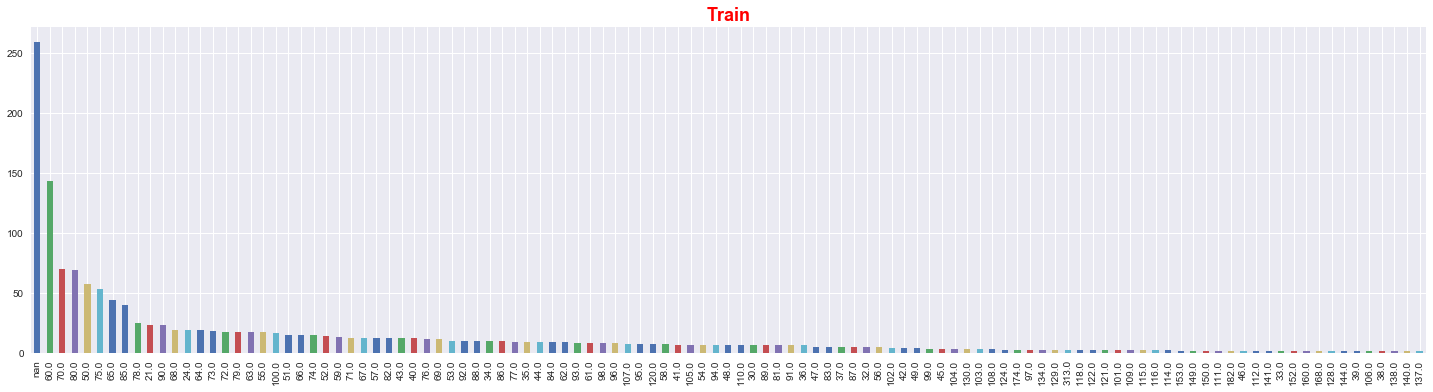

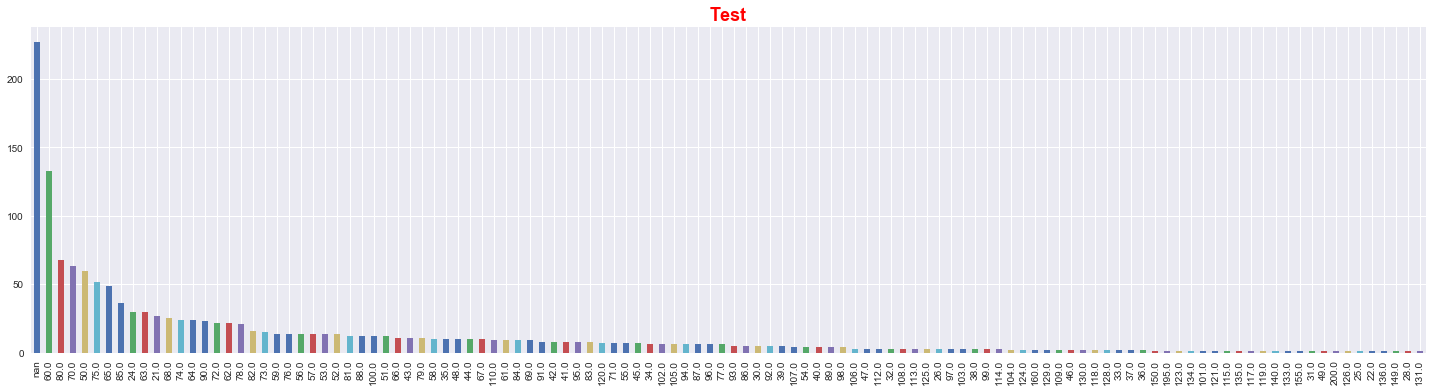

In [23]:
train.LotFrontage.value_counts(dropna=False).plot(kind='bar',figsize=(25,6))
plt.title('Train',fontsize=18,color='red',fontweight="bold")
plt.show()
test.LotFrontage.value_counts(dropna=False).plot(kind='bar',figsize=(25,6))
plt.title('Test',fontsize=18,color='red',fontweight="bold")
plt.show()

Replacing nan values with the average value: 

In [24]:
train.LotFrontage.fillna(round(train.LotFrontage.mean(),0),inplace=True)
test.LotFrontage.fillna(round(test.LotFrontage.mean(),0),inplace=True)

In [25]:
corr('LotFrontage')

CORRELATION:
LotFrontage and SalePrice: 0.33

LotFrontage won't be taken into account


#### 5.LotArea
*Lot size in square feet*

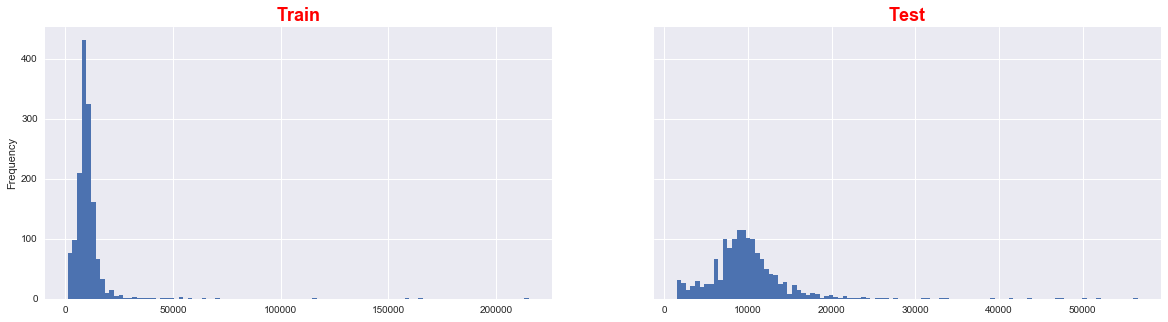

In [26]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight= 'bold')
ax2 = f.add_subplot(122,sharey = ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight= 'bold')
train.LotArea.plot.hist(ax=ax1,bins=100)
test.LotArea.plot.hist(ax=ax2,bins=100)
plt.show()

In [27]:
corr('LotArea')

CORRELATION:
LotArea and SalePrice: 0.26

LotArea won't be taken into account


#### 6.Street
*Type of road access to property.*

       Grvl	Gravel	
       Pave	Paved

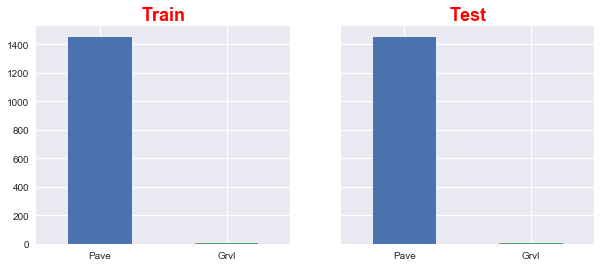

In [28]:
f = plt.figure(figsize=(10,4))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight= 'bold')
ax2 = f.add_subplot(122,sharey = ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight= 'bold')
train.Street.value_counts(dropna=False).plot.bar(ax=ax1,rot=0)
test.Street.value_counts(dropna=False).plot.bar(ax=ax2,rot=0)
plt.show()

Just in case, finding out the correlation with `SalePrice`:

In [29]:
pd.get_dummies(train[['Street','SalePrice']],drop_first=True).corr()

,SalePrice,Street_Pave
SalePrice,1.000000,0.041036
Street_Pave,0.041036,1.000000


Street_Pave won't be taken into account

#### 7.Alley
*Type of alley access to property*

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

Transforming `Na` into `Noacc`:

In [30]:
train.Alley.fillna('Noacc',inplace=True)
test.Alley.fillna('Noacc',inplace=True)

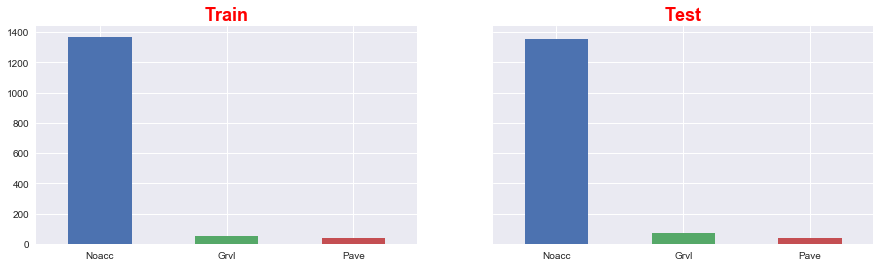

In [31]:
f = plt.figure(figsize=(15,4))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight= 'bold')
ax2 = f.add_subplot(122,sharey = ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight= 'bold')
train.Alley.value_counts(dropna=False).plot.bar(ax=ax1,rot=0)
test.Alley.value_counts(dropna=False).plot.bar(ax=ax2,rot=0)
plt.show()

Finding out the rate(r) of coincidence between `Street` and `Alley`:

In [32]:
rows_street_alley=train[train['Street']==train['Alley']].shape[0]
print('r={0:.2f}%'.format(rows_street_alley*100/train.shape[0]))

r=2.81%


In [33]:
corr('Alley')

CORRELATION:
Alley and SalePrice: 0.08

Alley won't be taken into account


#### 8.LotShape
*General shape of property.*

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

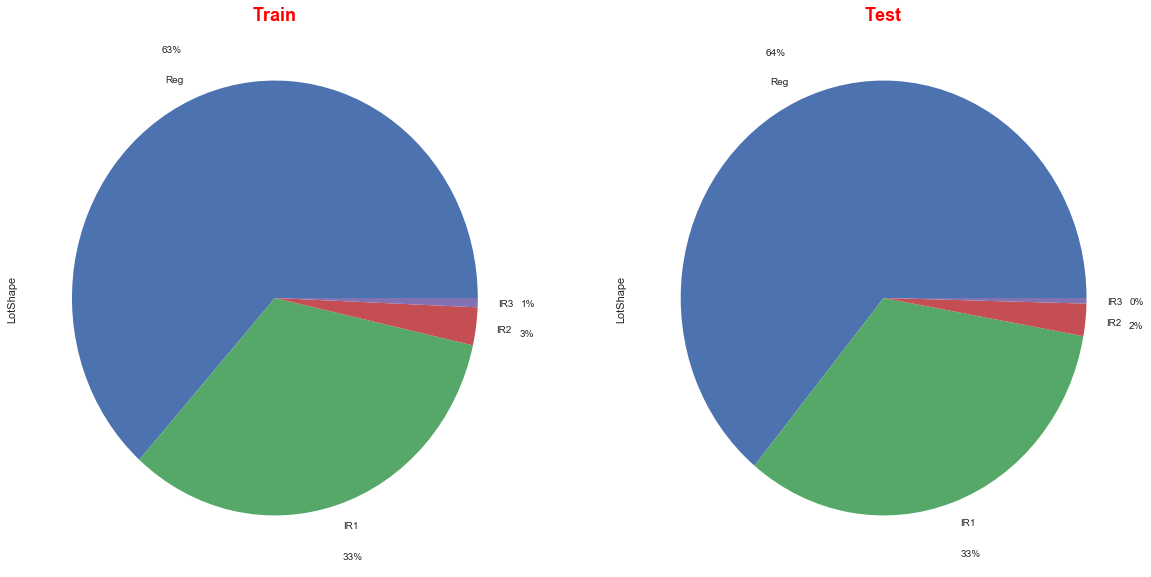

In [34]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.LotShape.value_counts(dropna=False).plot.pie(ax=ax1,autopct='%1.0f%%',pctdistance=1.25)
test.LotShape.value_counts(dropna=False).plot.pie(ax=ax2,autopct='%1.0f%%',pctdistance=1.25)
plt.show()

In [35]:
corr('LotShape')

CORRELATION:
LotShape and SalePrice: -0.26

LotShape won't be taken into account


#### 9.LandContour
*Flatness of the property*

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

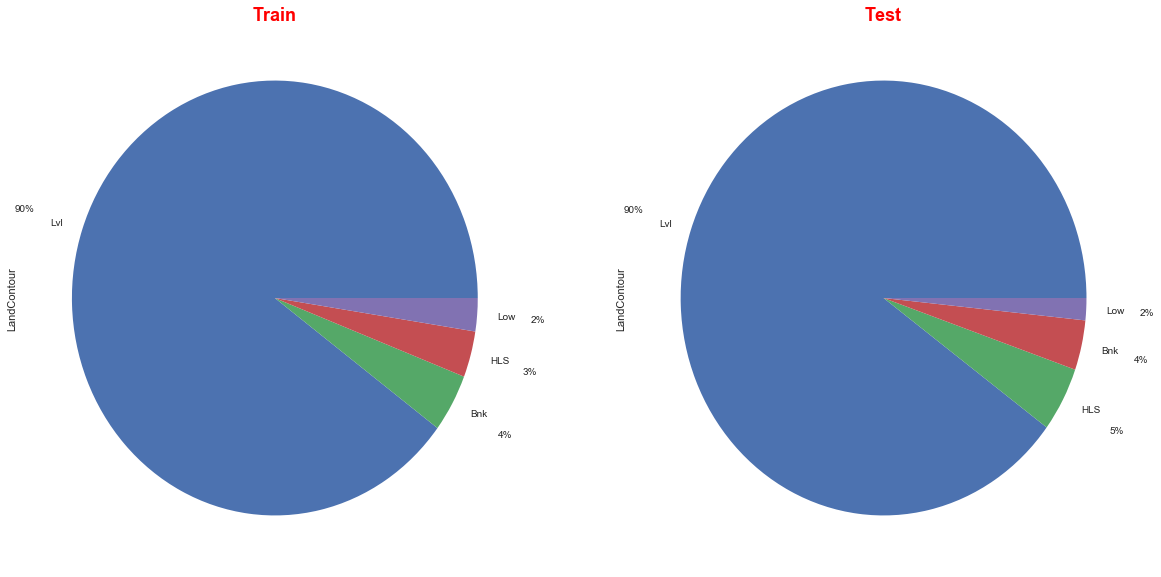

In [36]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.LandContour.value_counts(dropna=False).plot.pie(ax=ax1,autopct='%1.0f%%',pctdistance=1.3)
test.LandContour.value_counts(dropna=False).plot.pie(ax=ax2,autopct='%1.0f%%',pctdistance=1.3)
plt.show()

In [37]:
corr('LandContour')

CORRELATION:
LandContour and SalePrice: 0.02

LandContour won't be taken into account


#### 10.Utilities
*Type of utilities available.*
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	   Electricity only

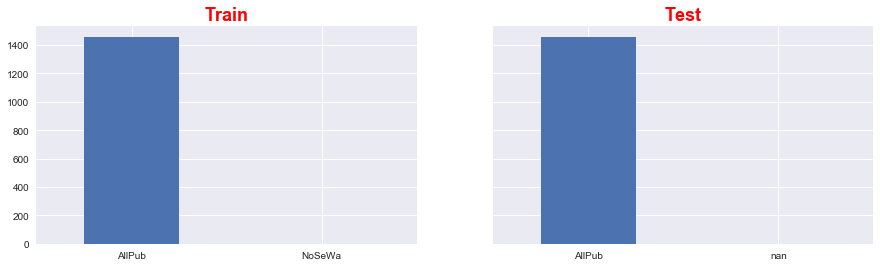

In [38]:
f = plt.figure(figsize=(15,4))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight= 'bold')
ax2 = f.add_subplot(122,sharey = ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight= 'bold')
train.Utilities.value_counts(dropna=False).plot.bar(ax=ax1,rot=0)
test.Utilities.value_counts(dropna=False).plot.bar(ax=ax2,rot=0)
plt.show()

In [39]:
corr('Utilities')

CORRELATION:
Utilities and SalePrice: -0.01

Utilities won't be taken into account


#### 11.LotConfig
*Lot configuration.*

       Inside	Inside lot
       Corner	Corner lot
       CulDSac   Cul-de-sac
       FR2	   Frontage on 2 sides of property
       FR3	   Frontage on 3 sides of property

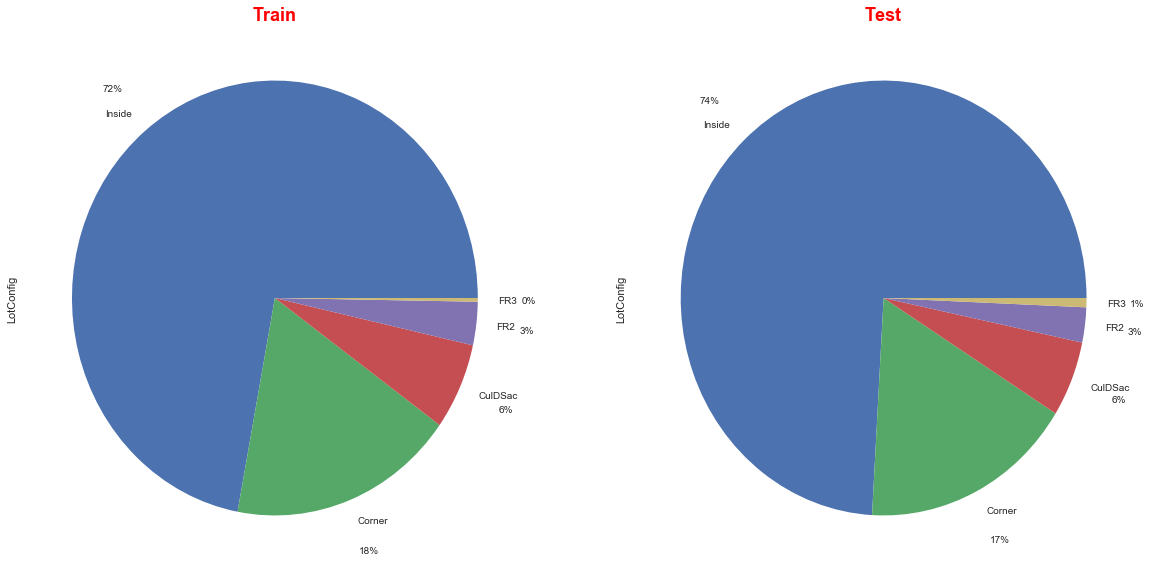

In [40]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.LotConfig.value_counts(dropna=False).plot.pie(ax=ax1,autopct='%1.0f%%',pctdistance=1.25)
test.LotConfig.value_counts(dropna=False).plot.pie(ax=ax2,autopct='%1.0f%%',pctdistance=1.25)
plt.show()

In [41]:
corr('LotConfig')

CORRELATION:
LotConfig and SalePrice: -0.07

LotConfig won't be taken into account


#### 12.LandSlope
*Slope of property:*
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

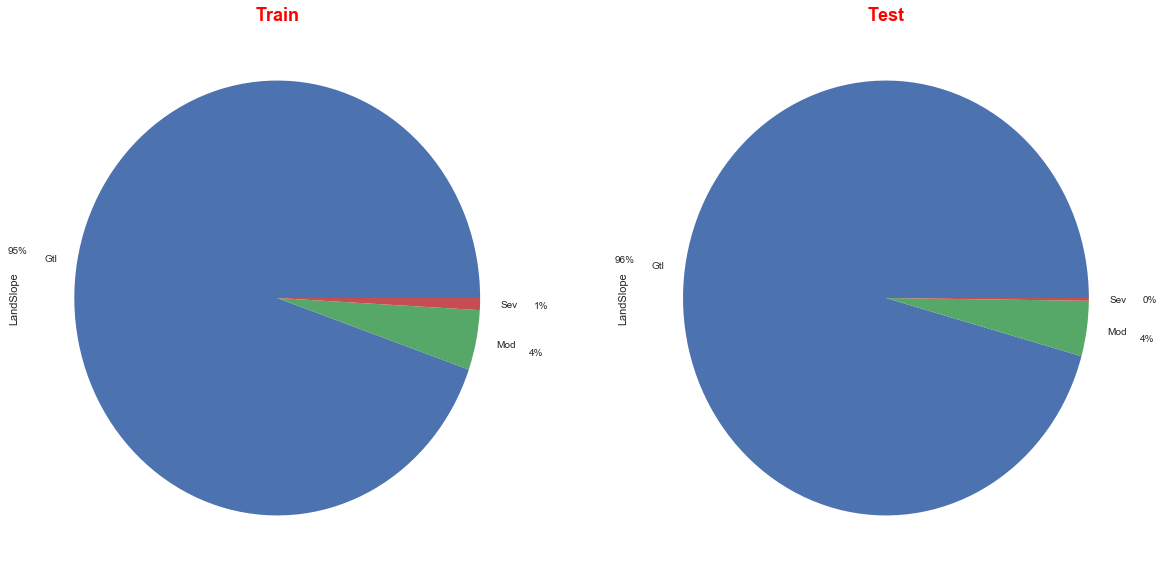

In [42]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.LandSlope.value_counts(dropna=False).plot.pie(ax=ax1,autopct='%1.0f%%',pctdistance=1.3)
test.LandSlope.value_counts(dropna=False).plot.pie(ax=ax2,autopct='%1.0f%%',pctdistance=1.3)
plt.show()

In [43]:
corr('LandSlope')

CORRELATION:
LandSlope and SalePrice: 0.05

LandSlope won't be taken into account


#### 13.Neighborhood
*Physical locations within Ames city limits:*

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	 Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	 Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	  North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	 Northwest Ames
       OldTown	Old Town
       SWISU	  South & West of Iowa State University
       Sawyer	 Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	 Timberland
       Veenker	Veenker

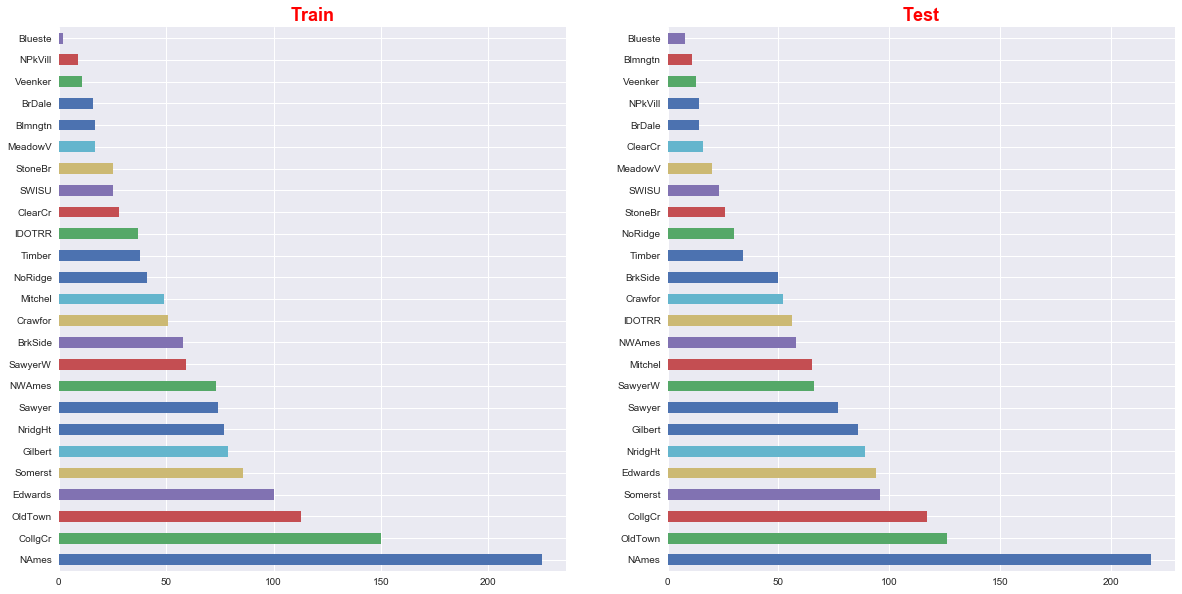

In [44]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.Neighborhood.value_counts(dropna=False).plot.barh(ax=ax1)
test.Neighborhood.value_counts(dropna=False).plot.barh(ax=ax2)
plt.show()

In [45]:
corr('Neighborhood')

CORRELATION:
Neighborhood and SalePrice: 0.21

Neighborhood won't be taken into account


#### 14.Condition1
*Proximity to various conditions:*
	
       Artery  Adjacent to arterial street
       Feedr   Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

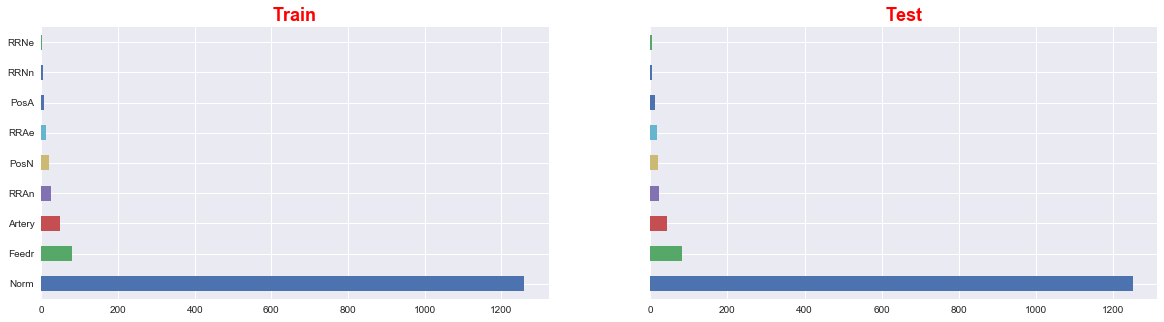

In [46]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.Condition1.value_counts(dropna=False).plot.barh(ax=ax1)
test.Condition1.value_counts(dropna=False).plot.barh(ax=ax2)
plt.show()

In [47]:
corr('Condition1')

CORRELATION:
Condition1 and SalePrice: 0.09

Condition1 won't be taken into account


#### 15.Condition2
*Proximity to various conditions (if more than one is present):*
		
       Artery  Adjacent to arterial street
       Feedr   Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

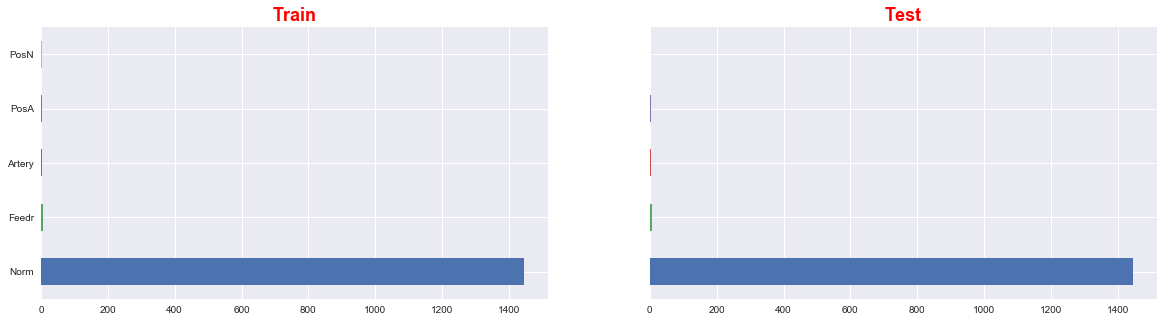

In [48]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.Condition2.value_counts(dropna=False).plot.barh(ax=ax1)
test.Condition2.value_counts(dropna=False).plot.barh(ax=ax2)
plt.show()

In [49]:
corr('Condition2')

CORRELATION:
Condition2 and SalePrice: 0.01

Condition2 won't be taken into account


#### 16.BldgType
*Type of dwelling:*
		
       1Fam	  Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	 Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

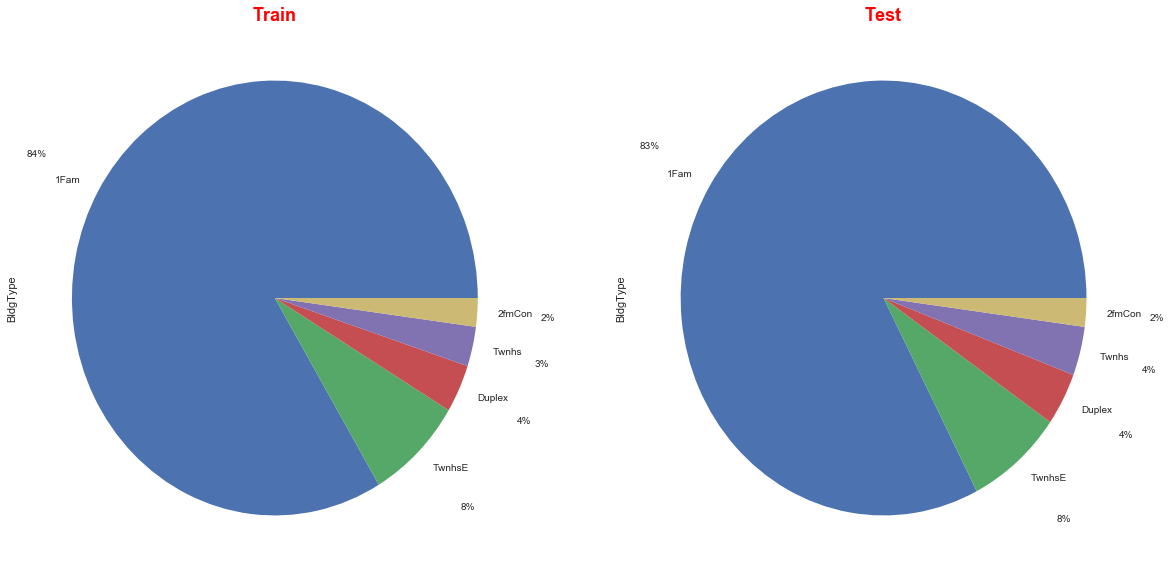

In [50]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.BldgType.value_counts(dropna=False).plot.pie(ax=ax1,autopct='%1.0f%%',pctdistance=1.35)
test.BldgType.value_counts(dropna=False).plot.pie(ax=ax2,autopct='%1.0f%%',pctdistance=1.35)
plt.show()

In [51]:
corr('BldgType')

CORRELATION:
BldgType and SalePrice: -0.09

BldgType won't be taken into account


#### 17.HouseStyle
*Style of dwelling:*
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	  Split Level

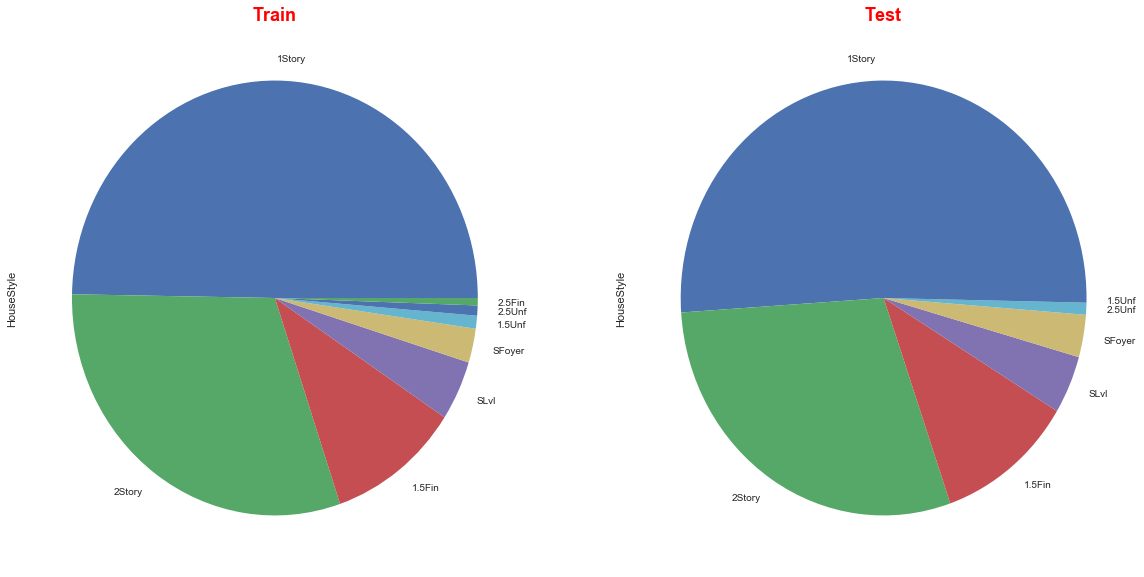

In [52]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.HouseStyle.value_counts(dropna=False).plot.pie(ax=ax1)
test.HouseStyle.value_counts(dropna=False).plot.pie(ax=ax2)
plt.show()

In [53]:
corr('HouseStyle')

CORRELATION:
HouseStyle and SalePrice: 0.18

HouseStyle won't be taken into account


#### 18.OverallQual
*Rates the overall material and finish of the house:*

       10   Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

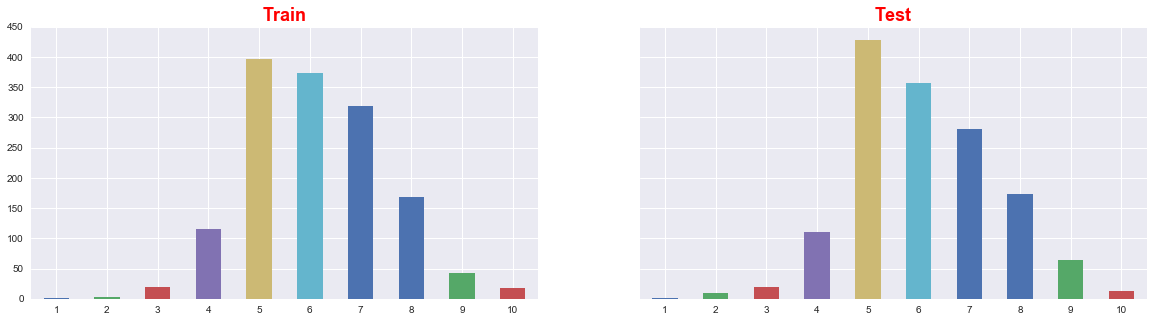

In [54]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey = ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.OverallQual.value_counts(dropna=False,sort=False).plot.bar(ax=ax1,rot=0)
test.OverallQual.value_counts(dropna=False,sort=False).plot.bar(ax=ax2,rot=0)
plt.show()

In [55]:
corr('OverallQual')

CORRELATION:
OverallQual and SalePrice: 0.79

OverallQual will be taken into account!!


#### 19.OverallCond
*Rates the overall condition of the house:*

       10   Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

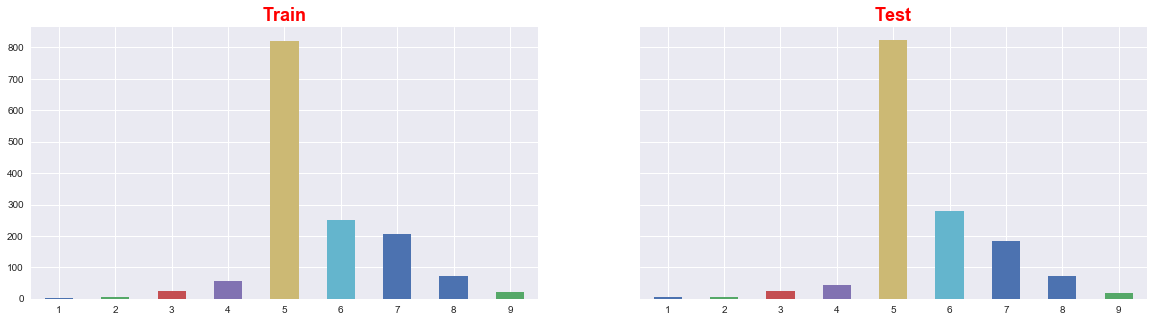

In [56]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey = ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.OverallCond.value_counts(dropna=False,sort=False).plot.bar(ax=ax1,rot=0)
test.OverallCond.value_counts(dropna=False,sort=False).plot.bar(ax=ax2,rot=0)
plt.show()

In [57]:
corr('OverallCond')

CORRELATION:
OverallCond and SalePrice: -0.08

OverallCond won't be taken into account


#### 20.YearBuilt
*Original construction date.*

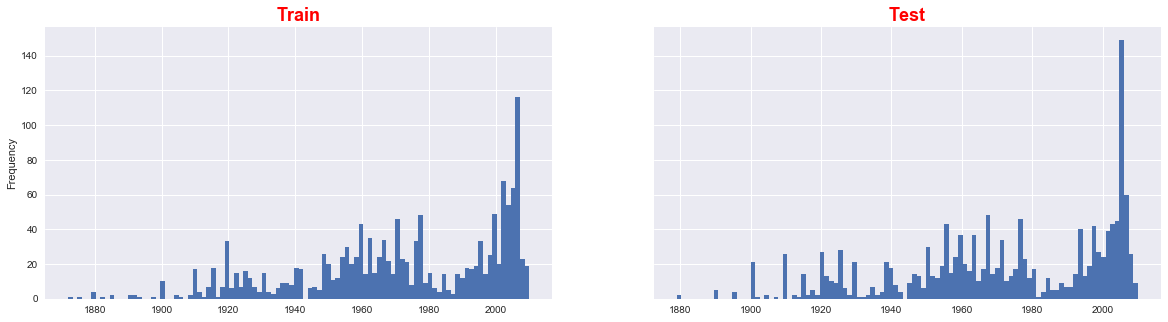

In [58]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey = ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.YearBuilt.plot.hist(ax=ax1,bins=100)
test.YearBuilt.plot.hist(ax=ax2,bins=100)
plt.show()

In [59]:
corr('YearBuilt')

CORRELATION:
YearBuilt and SalePrice: 0.52

YearBuilt won't be taken into account


#### 21.YearRemodAdd
*Remodel date (same as construction date if no remodeling or additions).*

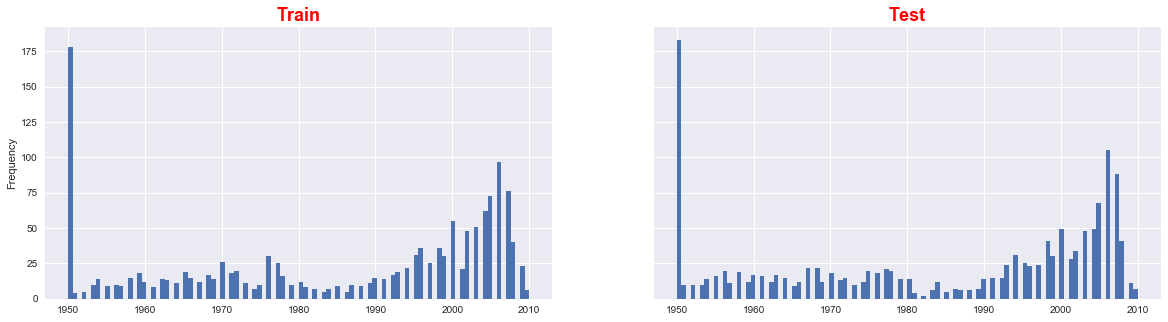

In [60]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey = ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.YearRemodAdd.plot.hist(ax=ax1,bins=100)
test.YearRemodAdd.plot.hist(ax=ax2,bins=100)
plt.show()

In [61]:
corr('YearRemodAdd')

CORRELATION:
YearRemodAdd and SalePrice: 0.51

YearRemodAdd won't be taken into account


#### 22.RoofStyle
*Type of roof:*

       Flat	   Flat
       Gable	  Gable
       Gambrel	Gabrel (Barn)
       Hip	    Hip
       Mansard	Mansard
       Shed	   Shed

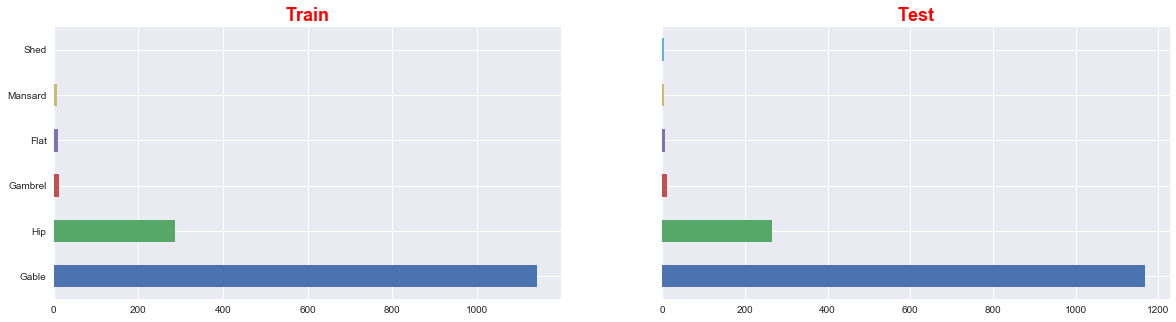

In [62]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.RoofStyle.value_counts(dropna=False).plot.barh(ax=ax1)
test.RoofStyle.value_counts(dropna=False).plot.barh(ax=ax2)
plt.show()

In [63]:
corr('RoofStyle')

CORRELATION:
RoofStyle and SalePrice: 0.22

RoofStyle won't be taken into account


#### 23.RoofMatl
*Roof material:*

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	  Metal
       Roll	   Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

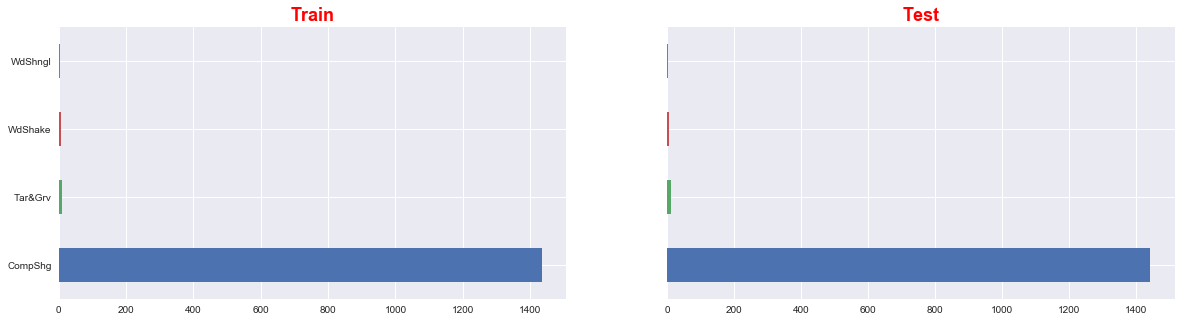

In [64]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey= ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.RoofMatl.value_counts(dropna=False).plot.barh(ax=ax1)
test.RoofMatl.value_counts(dropna=False).plot.barh(ax=ax2)
plt.show()

In [65]:
corr('RoofMatl')

CORRELATION:
RoofMatl and SalePrice: 0.13

RoofMatl won't be taken into account


#### 24.Exterior1st
*Exterior covering on house:*

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	 Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	  Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	  Stone
       Stucco	 Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

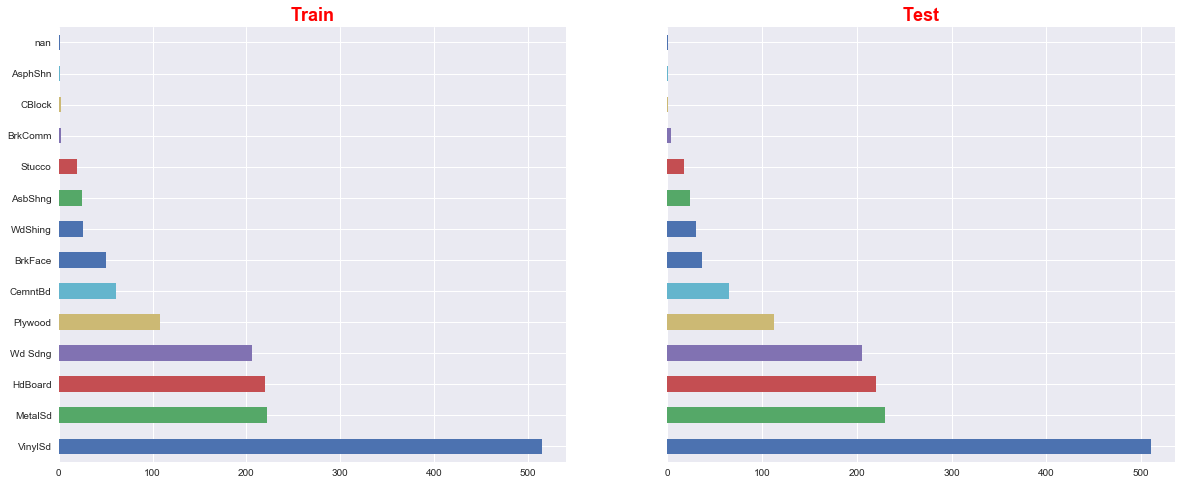

In [66]:
f = plt.figure(figsize=(20,8))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey = ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.Exterior1st.value_counts(dropna=False).plot.barh(ax=ax1)
test.Exterior1st.value_counts(dropna=False).plot.barh(ax=ax2)
plt.show()

Replacing NaN values with the mode:

In [67]:
train.Exterior1st.fillna(train.Exterior1st.mode().iloc[0],inplace=True)
test.Exterior1st.fillna(train.Exterior1st.mode().iloc[0],inplace=True)

In [68]:
corr('Exterior1st')

CORRELATION:
Exterior1st and SalePrice: 0.1

Exterior1st won't be taken into account


#### 25.Exterior2nd
*Exterior covering on house (if more than one material):*

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	 Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	  Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	  Stone
       Stucco	 Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

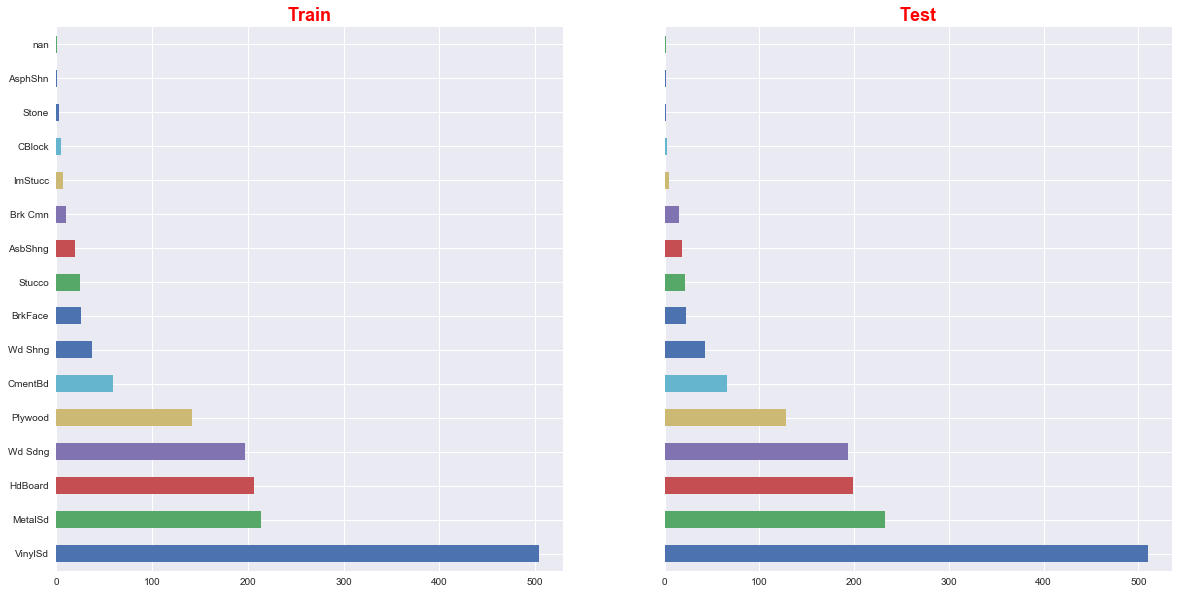

In [69]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey = ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.Exterior2nd.value_counts(dropna=False).plot.barh(ax=ax1)
test.Exterior2nd.value_counts(dropna=False).plot.barh(ax=ax2)
plt.show()

Replacing NaN values with the mode:

In [70]:
train.Exterior2nd.fillna(train.Exterior2nd.mode().iloc[0],inplace=True)
test.Exterior2nd.fillna(train.Exterior2nd.mode().iloc[0],inplace=True)

In [71]:
corr('Exterior2nd')

CORRELATION:
Exterior2nd and SalePrice: 0.1

Exterior2nd won't be taken into account


#### 26.MasVnrType
*Masonry veneer type:*

       BrkCmn	Brick Common
       BrkFace   Brick Face
       CBlock	Cinder Block
       None	  None
       Stone	 Stone

Replacing NaN values with `None`:

In [72]:
train.MasVnrType.fillna('None',inplace=True)
test.MasVnrType.fillna('None',inplace=True)

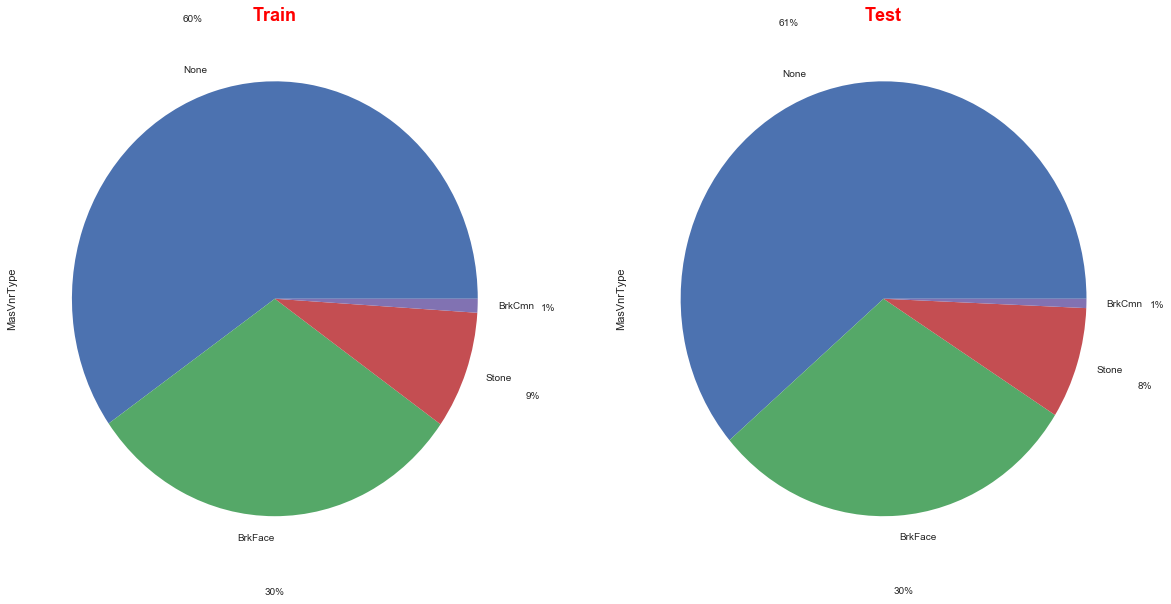

In [73]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.MasVnrType.value_counts(dropna=False).plot.pie(ax=ax1,autopct='%1.0f%%',pctdistance=1.35)
test.MasVnrType.value_counts(dropna=False).plot.pie(ax=ax2,autopct='%1.0f%%',pctdistance=1.35)
plt.show()

In [74]:
corr('MasVnrType')

CORRELATION:
MasVnrType and SalePrice: 0.02

MasVnrType won't be taken into account


#### 27.MasVnrArea
*Masonry veneer area in square feet.*

Replacing nan values with the average value:

In [75]:
train.MasVnrArea.fillna(round(train.MasVnrArea.mean(),1),inplace=True)
test.MasVnrArea.fillna(round(test.MasVnrArea.mean(),1),inplace=True)

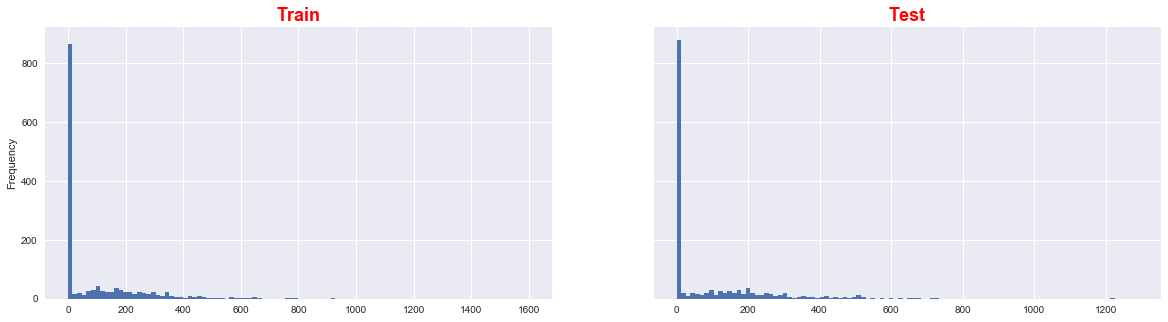

In [76]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey = ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.MasVnrArea.plot.hist(ax=ax1,bins=100)
test.MasVnrArea.plot.hist(ax=ax2,bins=100)
plt.show()

In [77]:
corr('MasVnrArea')

CORRELATION:
MasVnrArea and SalePrice: 0.48

MasVnrArea won't be taken into account


#### 28.ExterQual
*Evaluates the quality of the material on the exterior:* 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

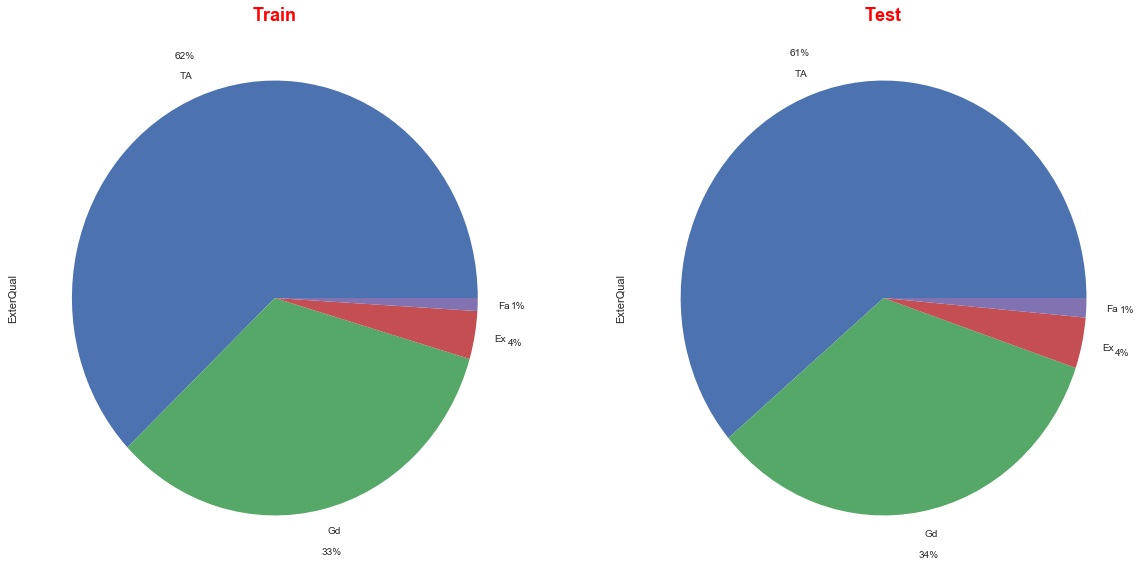

In [78]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.ExterQual.value_counts(dropna=False).plot.pie(ax=ax1,autopct='%1.0f%%',pctdistance=1.2)
test.ExterQual.value_counts(dropna=False).plot.pie(ax=ax2,autopct='%1.0f%%',pctdistance=1.2)
plt.show()

In [79]:
corr('ExterQual')

CORRELATION:
ExterQual and SalePrice: -0.64

ExterQual will be taken into account!!


#### 29.ExterCond
*Evaluates the present condition of the material on the exterior:*
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

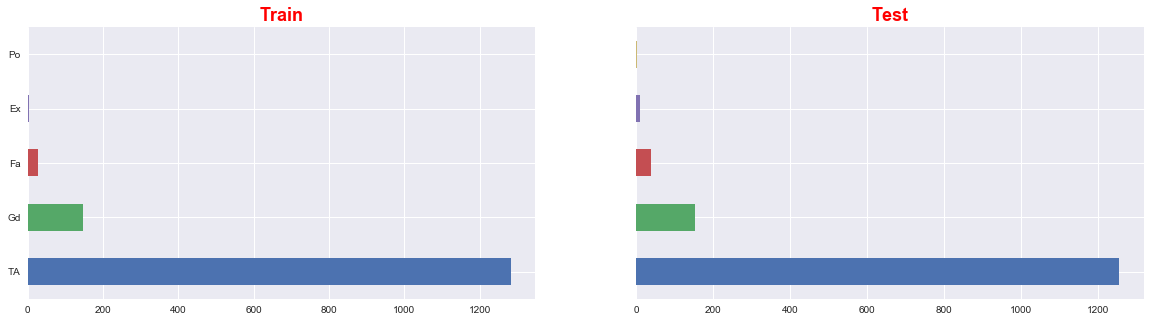

In [80]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey = ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.ExterCond.value_counts(dropna=False).plot.barh(ax=ax1)
test.ExterCond.value_counts(dropna=False).plot.barh(ax=ax2)
plt.show()

In [81]:
corr('ExterCond')

CORRELATION:
ExterCond and SalePrice: 0.12

ExterCond won't be taken into account


#### 30.Foundation
*Type of foundation:*
		
       BrkTil   Brick & Tile
       CBlock   Cinder Block
       PConc	Poured Contrete	
       Slab	 Slab
       Stone	Stone
       Wood	 Wood

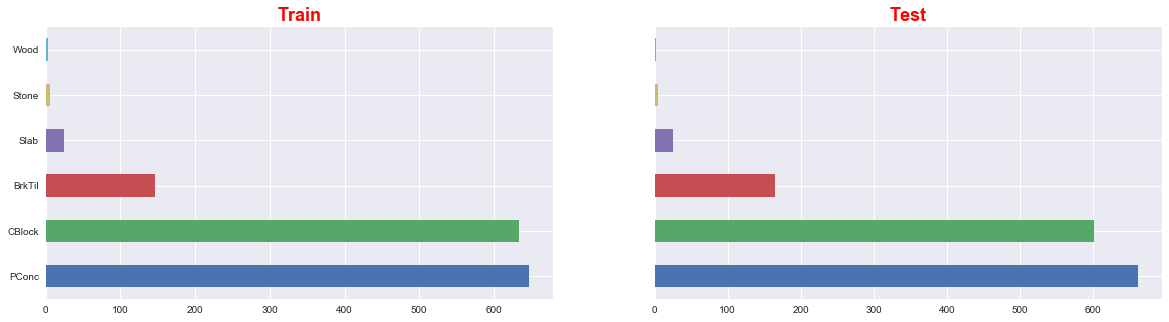

In [82]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey = ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.Foundation.value_counts(dropna=False).plot.barh(ax=ax1)
test.Foundation.value_counts(dropna=False).plot.barh(ax=ax2)
plt.show()

In [83]:
corr('Foundation')

CORRELATION:
Foundation and SalePrice: 0.38

Foundation won't be taken into account


#### 31.BsmtQual
*Evaluates the height of the basement:*

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches)
       NA	No Basement

Replacing NaN values with `NoBa`:

In [84]:
train.BsmtQual.fillna('NoBa',inplace=True)
test.BsmtQual.fillna('NoBa',inplace=True)

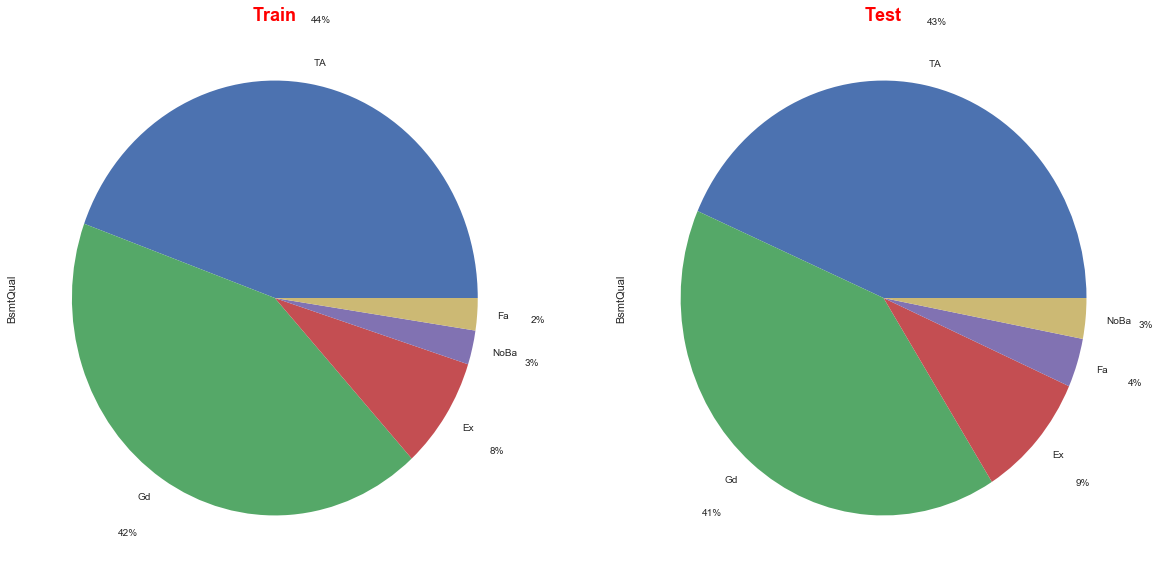

In [85]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.BsmtQual.value_counts(dropna=False).plot.pie(ax=ax1,autopct='%1.0f%%',pctdistance=1.3)
test.BsmtQual.value_counts(dropna=False).plot.pie(ax=ax2,autopct='%1.0f%%',pctdistance=1.3)
plt.show()

In [86]:
corr('BsmtQual')

CORRELATION:
BsmtQual and SalePrice: -0.59

BsmtQual will be taken into account!!


#### 32.BsmtCond
*Evaluates the general condition of the basement:*

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

Replacing NaN values with `NoBa`:

In [87]:
train.BsmtCond.fillna('NoBa',inplace=True)
test.BsmtCond.fillna('NoBa',inplace=True)

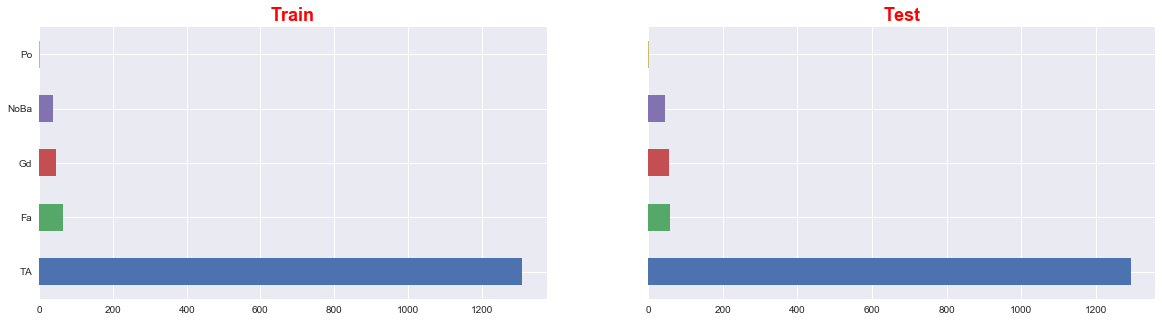

In [88]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey = ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.BsmtCond.value_counts(dropna=False).plot.barh(ax=ax1)
test.BsmtCond.value_counts(dropna=False).plot.barh(ax=ax2)
plt.show()

In [89]:
corr('BsmtCond')

CORRELATION:
BsmtCond and SalePrice: 0.09

BsmtCond won't be taken into account


#### 33.BsmtExposure
*Refers to walkout or garden level walls:*

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

Replacing NaN values with `NoBa`:

In [90]:
train.BsmtExposure.fillna('NoBa',inplace=True)
test.BsmtExposure.fillna('NoBa',inplace=True)

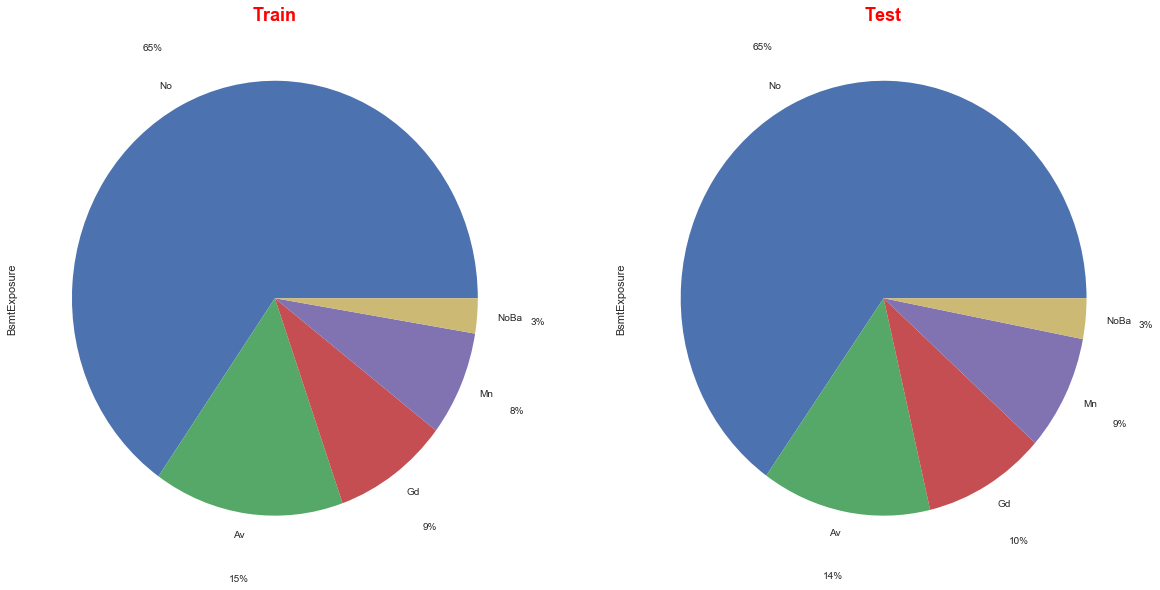

In [91]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.BsmtExposure.value_counts(dropna=False).plot.pie(ax=ax1,autopct='%1.0f%%',pctdistance=1.3)
test.BsmtExposure.value_counts(dropna=False).plot.pie(ax=ax2,autopct='%1.0f%%',pctdistance=1.3)
plt.show()

In [92]:
corr('BsmtExposure')

CORRELATION:
BsmtExposure and SalePrice: -0.31

BsmtExposure won't be taken into account


#### 34.BsmtFinType1
*Rating of basement finished area:*

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	 No Basement

Replacing NaN values with `NoBa`:

In [93]:
train.BsmtFinType1.fillna('NoBa',inplace=True)
test.BsmtFinType1.fillna('NoBa',inplace=True)

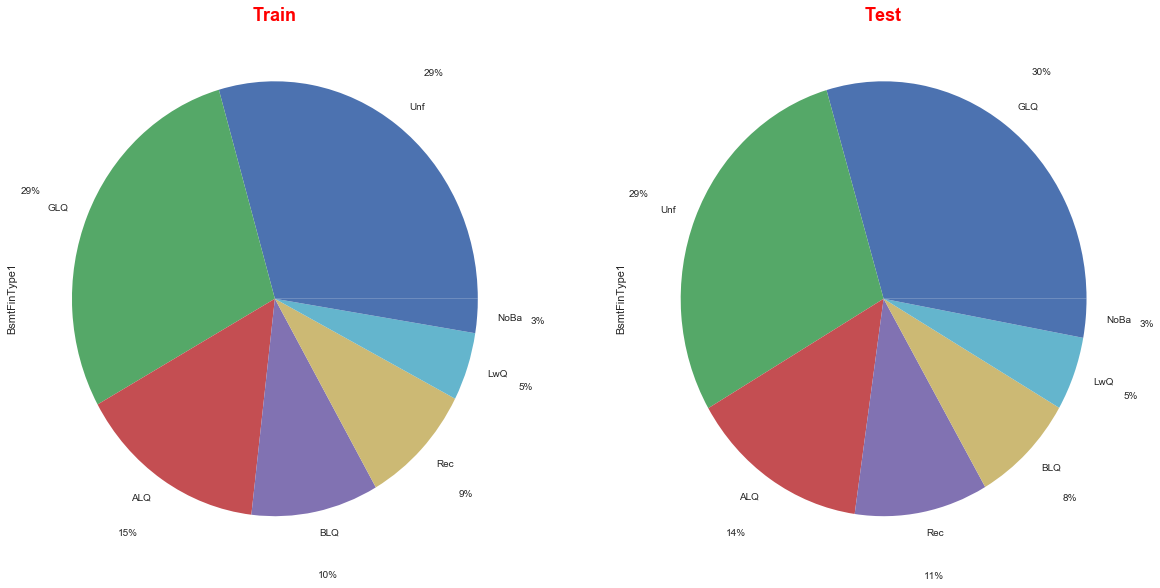

In [94]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.BsmtFinType1.value_counts(dropna=False).plot.pie(ax=ax1,autopct='%1.0f%%',pctdistance=1.3)
test.BsmtFinType1.value_counts(dropna=False).plot.pie(ax=ax2,autopct='%1.0f%%',pctdistance=1.3)
plt.show()

In [95]:
corr('BsmtFinType1')

CORRELATION:
BsmtFinType1 and SalePrice: -0.1

BsmtFinType1 won't be taken into account


#### 35.BsmtFinSF1
*Type 1 finished square feet.*<br>
Chequing the number of times NaN value appear:

In [96]:
train.BsmtFinSF1.isnull().sum()

0

In [97]:
test.BsmtFinSF1.isnull().sum()

1

Replacing it with the mean value: 

In [98]:
test.BsmtFinSF1.fillna(round(test.BsmtFinSF1.mean(),1),inplace=True)

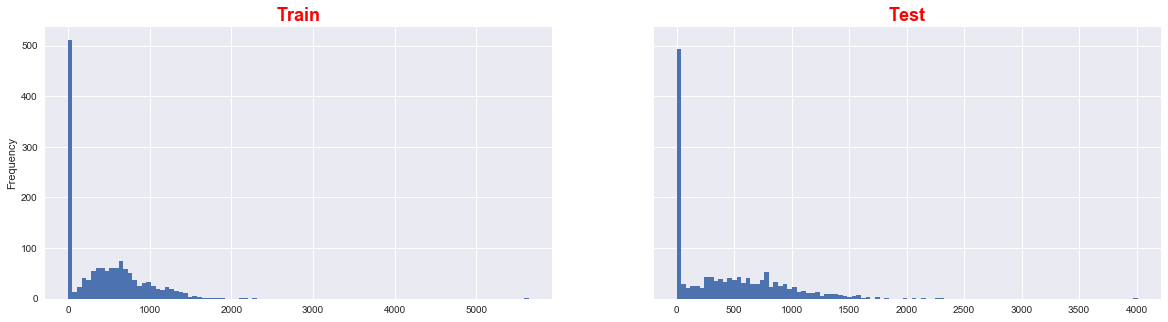

In [99]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.BsmtFinSF1.plot.hist(ax=ax1,bins=100)
test.BsmtFinSF1.plot.hist(ax=ax2,bins=100)
plt.show()

In [100]:
corr('BsmtFinSF1')

CORRELATION:
BsmtFinSF1 and SalePrice: 0.39

BsmtFinSF1 won't be taken into account


#### 36.BsmtFinType2
*Rating of basement finished area (if multiple types):*

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	 No Basement

Replacing NaN values with `NoBa`:

In [101]:
train.BsmtFinType2.fillna('NoBa',inplace=True)
test.BsmtFinType2.fillna('NoBa',inplace=True)

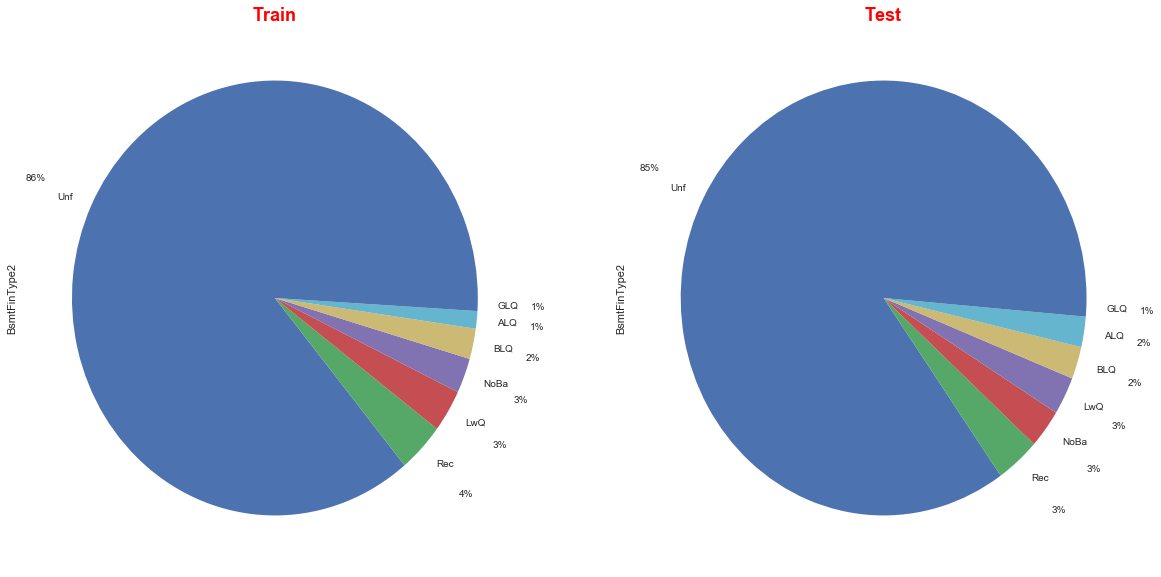

In [102]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.BsmtFinType2.value_counts(dropna=False).plot.pie(ax=ax1,autopct='%1.0f%%',pctdistance=1.3)
test.BsmtFinType2.value_counts(dropna=False).plot.pie(ax=ax2,autopct='%1.0f%%',pctdistance=1.3)
plt.show()

In [103]:
corr('BsmtFinType2')

CORRELATION:
BsmtFinType2 and SalePrice: 0.07

BsmtFinType2 won't be taken into account


#### 37.BsmtFinSF2
*Type 2 finished square feet.*

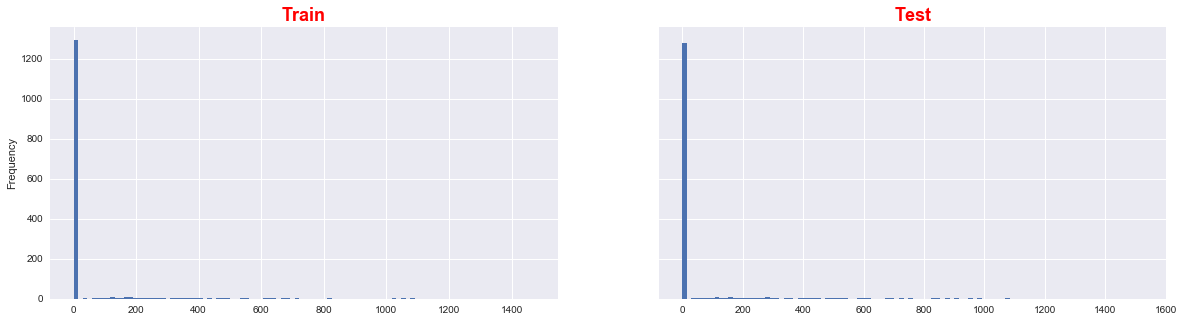

In [104]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.BsmtFinSF2.plot.hist(ax=ax1,bins=100)
test.BsmtFinSF2.plot.hist(ax=ax2,bins=100)
plt.show()

In [105]:
corr('BsmtFinSF2')

CORRELATION:
BsmtFinSF2 and SalePrice: -0.01

BsmtFinSF2 won't be taken into account


#### 38.BsmtUnfSF
*Unfinished square feet of basement area.*<br>
Checking the number of times NaN values appear:

In [106]:
train.BsmtUnfSF.isnull().sum()

0

In [107]:
test.BsmtUnfSF.isnull().sum()

1

Replacing it with the mean value:

In [108]:
test.BsmtUnfSF.fillna(round(test.BsmtUnfSF.mean(),1),inplace=True)

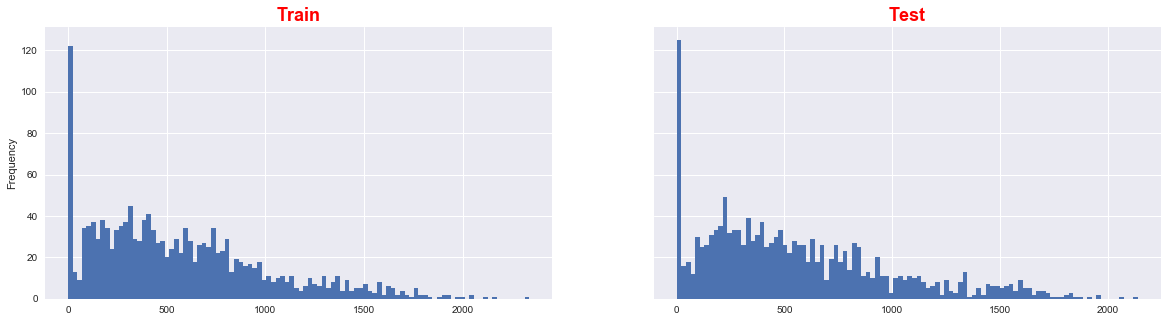

In [109]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.BsmtUnfSF.plot.hist(ax=ax1,bins=100)
test.BsmtUnfSF.plot.hist(ax=ax2,bins=100)
plt.show()

In [110]:
corr('BsmtUnfSF')

CORRELATION:
BsmtUnfSF and SalePrice: 0.21

BsmtUnfSF won't be taken into account


#### 39.TotalBsmtSF
*Total square feet of basement area.*<br>
Checking the number of times NaN values appear:

In [111]:
train.TotalBsmtSF.isnull().sum()

0

In [112]:
test.TotalBsmtSF.isnull().sum()

1

Replacing it with the average value:

In [113]:
test.TotalBsmtSF.fillna(round(test.TotalBsmtSF.mean(),1),inplace=True)

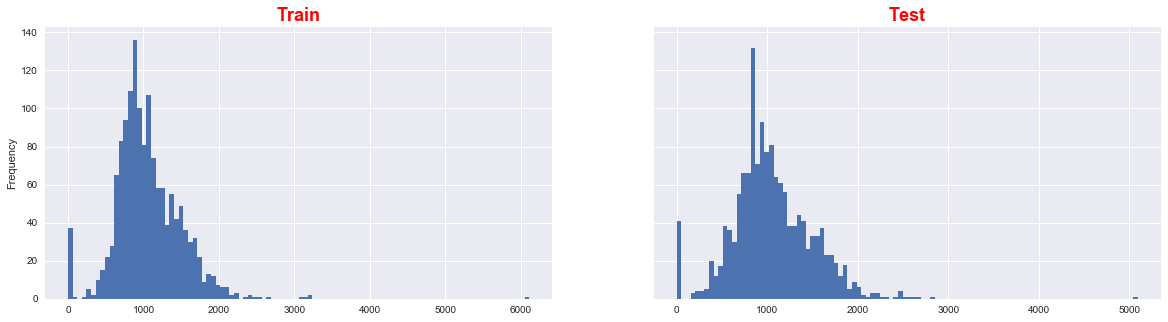

In [114]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.TotalBsmtSF.plot.hist(ax=ax1,bins=100)
test.TotalBsmtSF.plot.hist(ax=ax2,bins=100)
plt.show()

In [115]:
corr('TotalBsmtSF')

CORRELATION:
TotalBsmtSF and SalePrice: 0.61

TotalBsmtSF will be taken into account!!


#### 40.Heating
*Type of heating:*
		
       Floor   Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

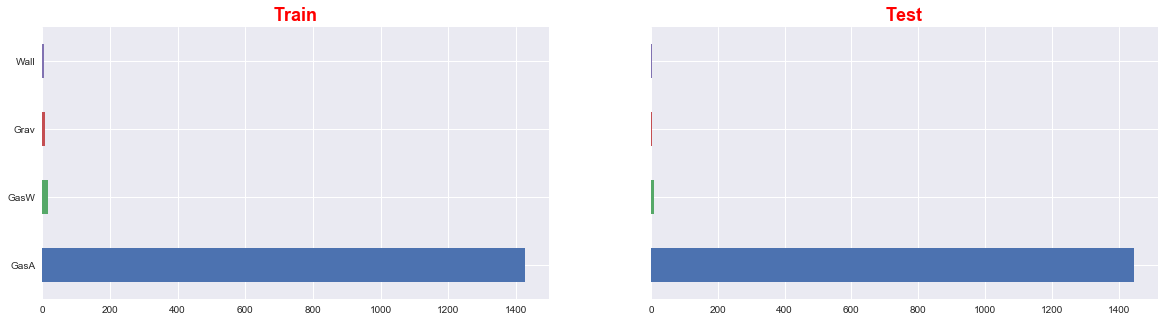

In [116]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey = ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.Heating.value_counts(dropna=False).plot.barh(ax=ax1)
test.Heating.value_counts(dropna=False).plot.barh(ax=ax2)
plt.show()

In [117]:
corr('Heating')

CORRELATION:
Heating and SalePrice: -0.1

Heating won't be taken into account


#### 41.HeatingQC
*Heating quality and condition:*

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

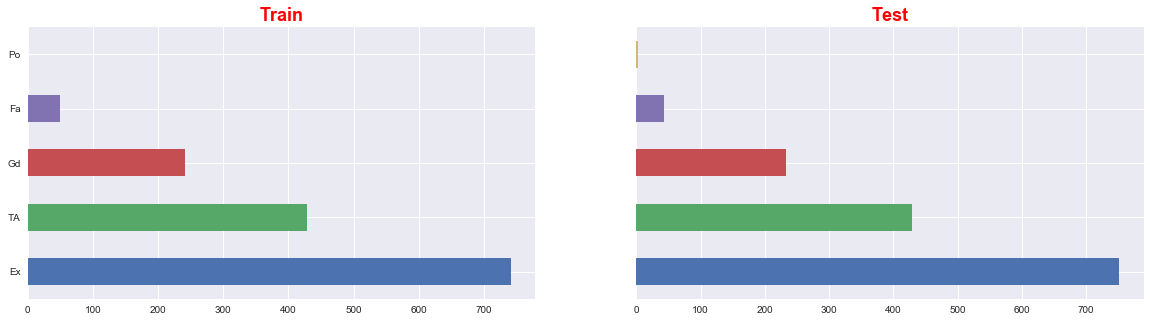

In [118]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey = ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.HeatingQC.value_counts(dropna=False).plot.barh(ax=ax1)
test.HeatingQC.value_counts(dropna=False).plot.barh(ax=ax2)
plt.show()

In [119]:
corr('HeatingQC')

CORRELATION:
HeatingQC and SalePrice: -0.4

HeatingQC won't be taken into account


#### 42.CentralAir
*Central air conditioning:*

       N	No
       Y	Yes

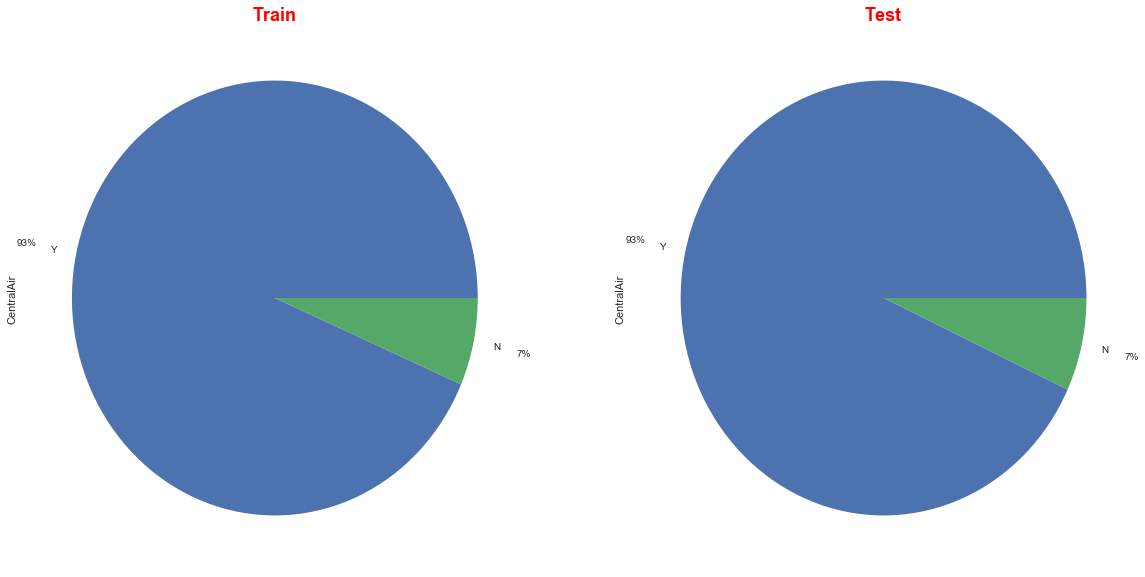

In [120]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.CentralAir.value_counts(dropna=False).plot.pie(ax=ax1,autopct='%1.0f%%',pctdistance=1.25)
test.CentralAir.value_counts(dropna=False).plot.pie(ax=ax2,autopct='%1.0f%%',pctdistance=1.25)
plt.show()

In [121]:
corr('CentralAir')

CORRELATION:
CentralAir and SalePrice: 0.25

CentralAir won't be taken into account


#### 43.Electrical
*Electrical system:*

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	  Mixed

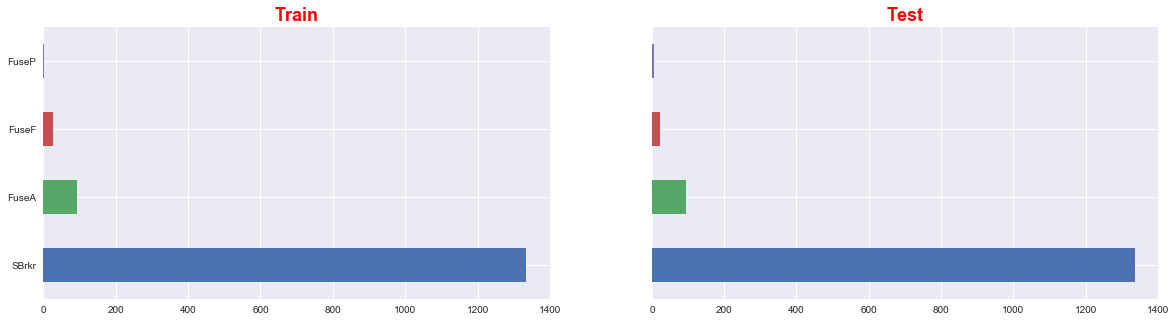

In [122]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.Electrical.value_counts(dropna=False).plot.barh(ax=ax1)
test.Electrical.value_counts(dropna=False).plot.barh(ax=ax2)
plt.show()

Replacing nan values with mode:

In [123]:
train.Electrical.fillna(train.Electrical.mode().iloc[0],inplace=True)
test.Electrical.fillna(test.Electrical.mode().iloc[0],inplace=True)

In [124]:
corr('Electrical')

CORRELATION:
Electrical and SalePrice: 0.23

Electrical won't be taken into account


#### 44.1stFlrSF
*First Floor square feet.*

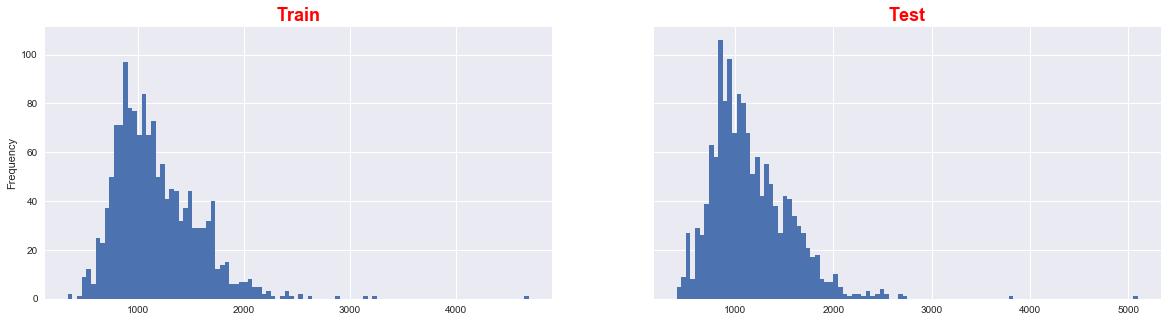

In [125]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train['1stFlrSF'].plot.hist(ax=ax1,bins=100)
test['1stFlrSF'].plot.hist(ax=ax2,bins=100)
plt.show()

In [126]:
corr('1stFlrSF')

CORRELATION:
1stFlrSF and SalePrice: 0.61

1stFlrSF will be taken into account!!


#### 45.2ndFlrSF
*Second floor square feet.*

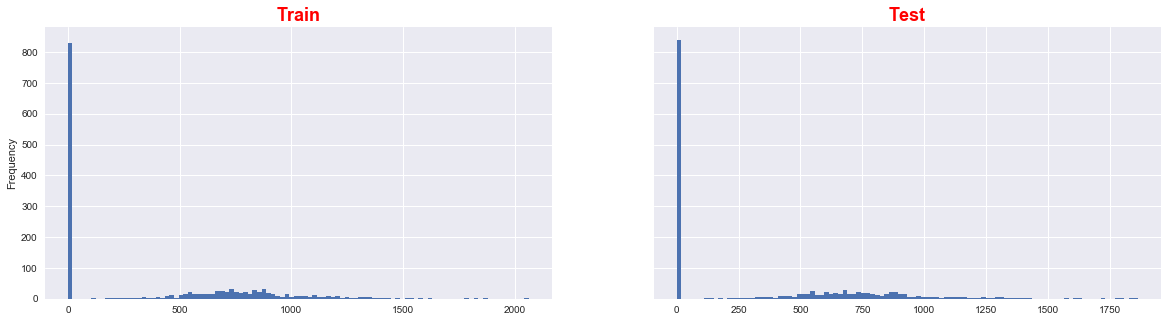

In [127]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train['2ndFlrSF'].plot.hist(ax=ax1,bins=100)
test['2ndFlrSF'].plot.hist(ax=ax2,bins=100)
plt.show()

In [128]:
corr('2ndFlrSF')

CORRELATION:
2ndFlrSF and SalePrice: 0.32

2ndFlrSF won't be taken into account


#### 46.LowQualFinSF
*Low quality finished square feet (all floors).*

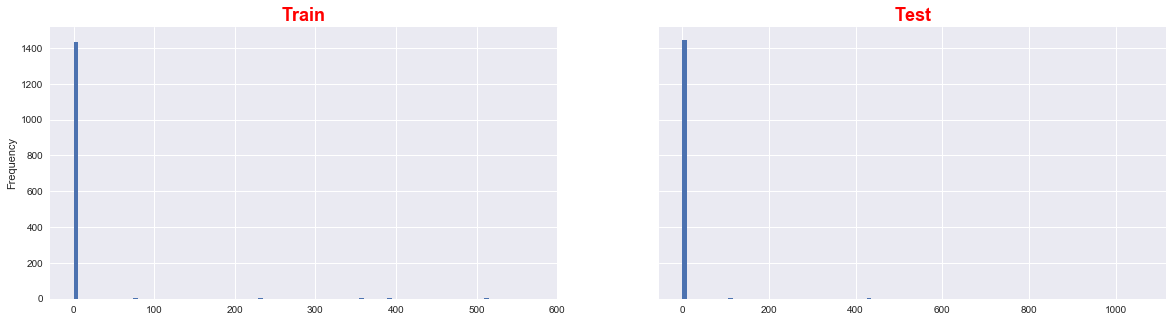

In [129]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.LowQualFinSF.plot.hist(ax=ax1,bins=100)
test.LowQualFinSF.plot.hist(ax=ax2,bins=100)
plt.show()

In [130]:
corr('LowQualFinSF')

CORRELATION:
LowQualFinSF and SalePrice: -0.03

LowQualFinSF won't be taken into account


#### 47.GrLivArea
*Above grade (ground) living area square feet.*

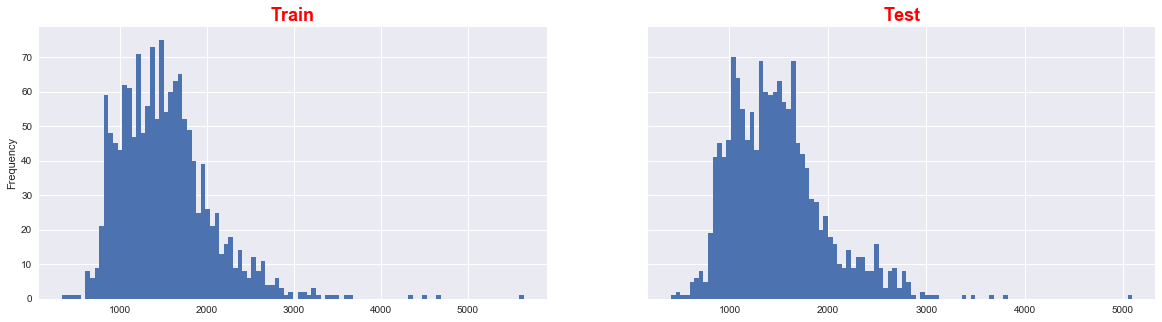

In [131]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.GrLivArea.plot.hist(ax=ax1,bins=100)
test.GrLivArea.plot.hist(ax=ax2,bins=100)
plt.show()

In [132]:
corr('GrLivArea')

CORRELATION:
GrLivArea and SalePrice: 0.71

GrLivArea will be taken into account!!


#### 48.BsmtFullBath
*Basement full bathrooms.*

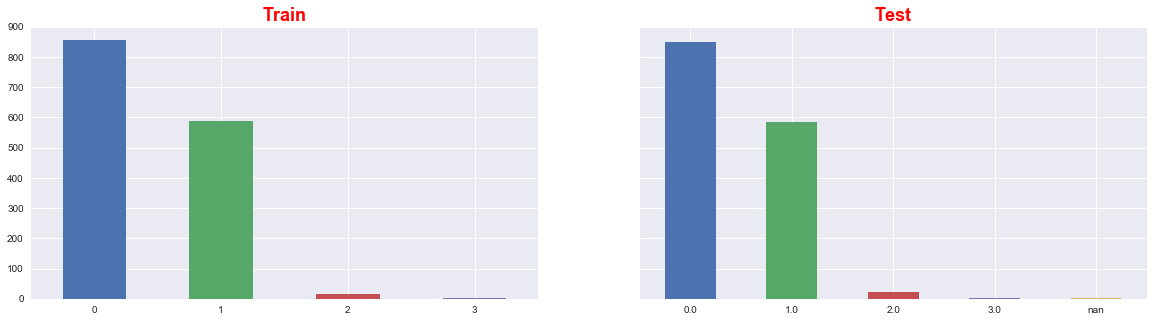

In [133]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.BsmtFullBath.value_counts(dropna=False,sort=False).plot.bar(ax=ax1,rot=0)
test.BsmtFullBath.value_counts(dropna=False,sort=False).plot.bar(ax=ax2,rot=0)
plt.show()

Replacing NaN values with the average value:

In [134]:
train.BsmtFullBath.fillna(round(train.BsmtFullBath.mean(),0),inplace=True)
test.BsmtFullBath.fillna(round(test.BsmtFullBath.mean(),0),inplace=True)

In [135]:
corr('BsmtFullBath')

CORRELATION:
BsmtFullBath and SalePrice: 0.23

BsmtFullBath won't be taken into account


#### 49.BsmtHalfBath
*Basement half bathrooms.*

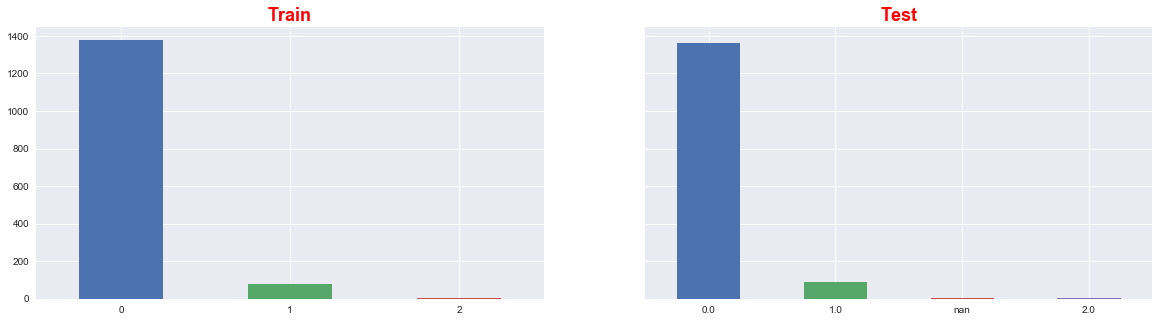

In [136]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.BsmtHalfBath.value_counts(dropna=False,sort=False).plot.bar(ax=ax1,rot=0)
test.BsmtHalfBath.value_counts(dropna=False,sort=False).plot.bar(ax=ax2,rot=0)
plt.show()

Replacing nan values with the mode:

In [137]:
train.BsmtHalfBath.fillna(train.BsmtHalfBath.mode().iloc[0],inplace=True)
test.BsmtHalfBath.fillna(test.BsmtHalfBath.mode().iloc[0],inplace=True)

In [138]:
corr('BsmtHalfBath')

CORRELATION:
BsmtHalfBath and SalePrice: -0.02

BsmtHalfBath won't be taken into account


#### 50.FullBath
*Full bathrooms above grade.*

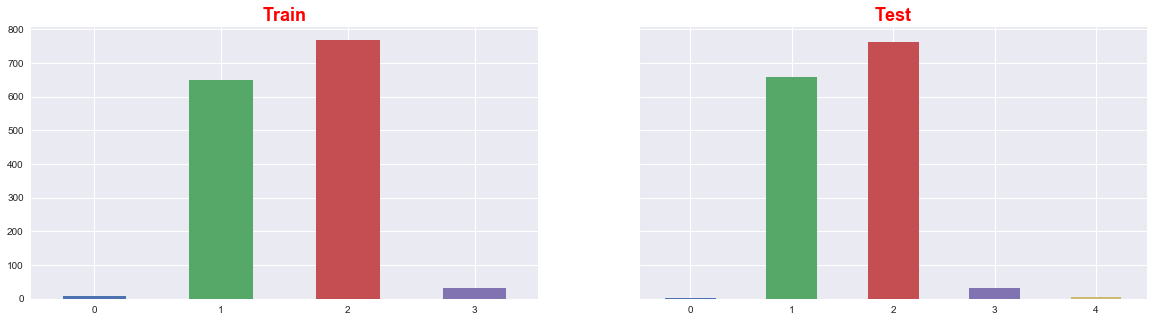

In [139]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.FullBath.value_counts(dropna=False,sort=False).plot.bar(ax=ax1,rot=0)
test.FullBath.value_counts(dropna=False,sort=False).plot.bar(ax=ax2,rot=0)
plt.show()

In [140]:
corr('FullBath')

CORRELATION:
FullBath and SalePrice: 0.56

FullBath will be taken into account!!


#### 51.HalfBath
*Half baths above grade.*

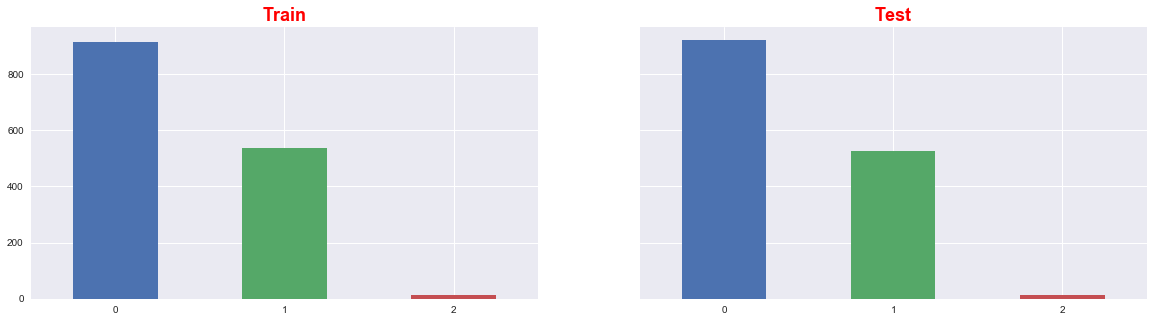

In [141]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.HalfBath.value_counts(dropna=False,sort=False).plot.bar(ax=ax1,rot=0)
test.HalfBath.value_counts(dropna=False,sort=False).plot.bar(ax=ax2,rot=0)
plt.show()

In [142]:
corr('HalfBath')

CORRELATION:
HalfBath and SalePrice: 0.28

HalfBath won't be taken into account


#### 52.BedroomAbvGr
*Bedrooms above grade (does NOT include basement bedrooms).*

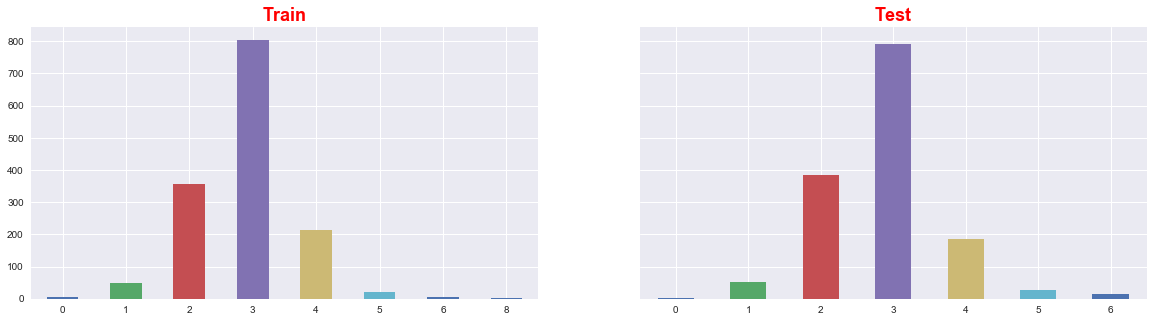

In [143]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.BedroomAbvGr.value_counts(dropna=False,sort=False).plot.bar(ax=ax1,rot=0)
test.BedroomAbvGr.value_counts(dropna=False,sort=False).plot.bar(ax=ax2,rot=0)
plt.show()

In [144]:
corr('BedroomAbvGr')

CORRELATION:
BedroomAbvGr and SalePrice: 0.17

BedroomAbvGr won't be taken into account


#### 53.KitchenAbvGr
*Kitchens above grade.*

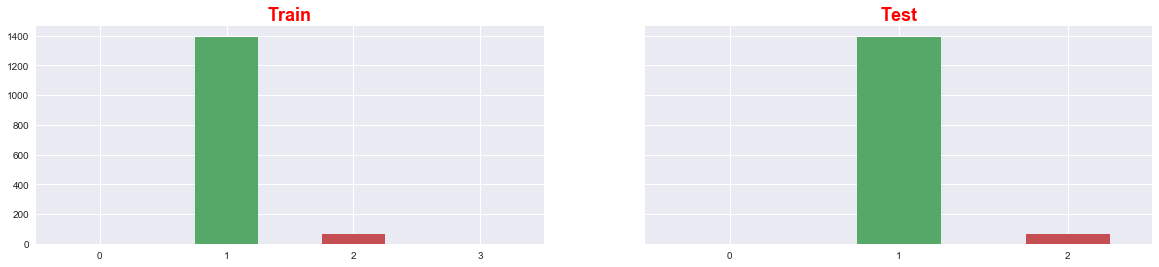

In [145]:
f = plt.figure(figsize=(20,4))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.KitchenAbvGr.value_counts(dropna=False,sort=False).plot.bar(ax=ax1,rot=0)
test.KitchenAbvGr.value_counts(dropna=False,sort=False).plot.bar(ax=ax2,rot=0)
plt.show()

In [146]:
corr('KitchenAbvGr')

CORRELATION:
KitchenAbvGr and SalePrice: -0.14

KitchenAbvGr won't be taken into account


#### 54.KitchenQual
*Kitchen quality:*

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

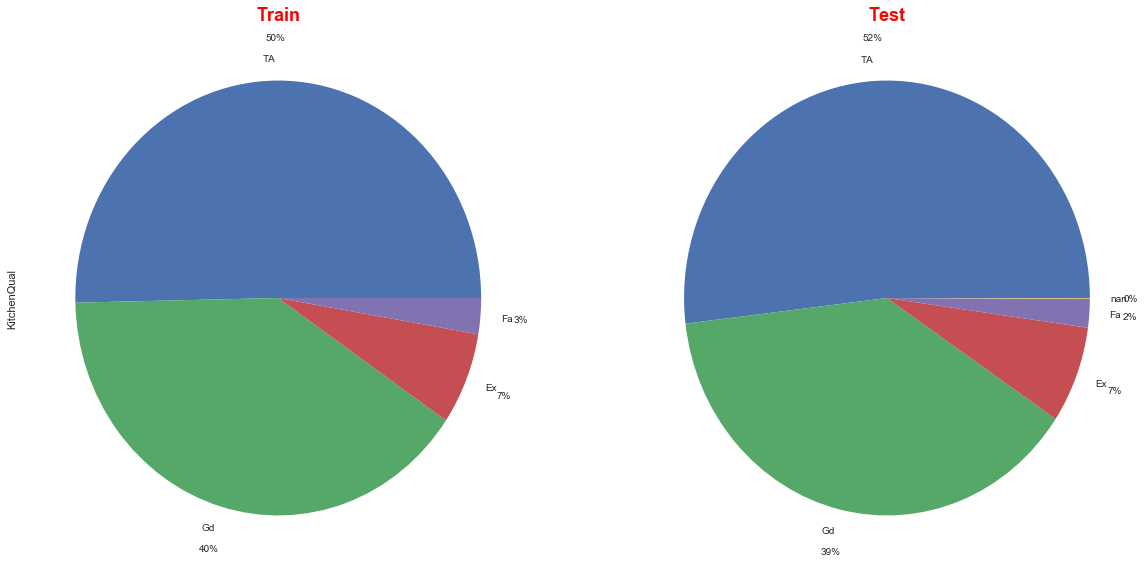

In [147]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.KitchenQual.value_counts(dropna=False).plot.pie(ax=ax1,autopct='%1.0f%%',pctdistance=1.2)
test.KitchenQual.value_counts(dropna=False).plot.pie(ax=ax2,autopct='%1.0f%%',pctdistance=1.2)
plt.show()

Replacing NaN values with mode:

In [148]:
train.KitchenQual.fillna(train.KitchenQual.mode().iloc[0],inplace=True)
test.KitchenQual.fillna(test.KitchenQual.mode().iloc[0],inplace=True)

In [149]:
corr('KitchenQual')

CORRELATION:
KitchenQual and SalePrice: -0.59

KitchenQual will be taken into account!!


#### 55.TotRmsAbvGrd
*Total rooms above grade (does not include bathrooms).*

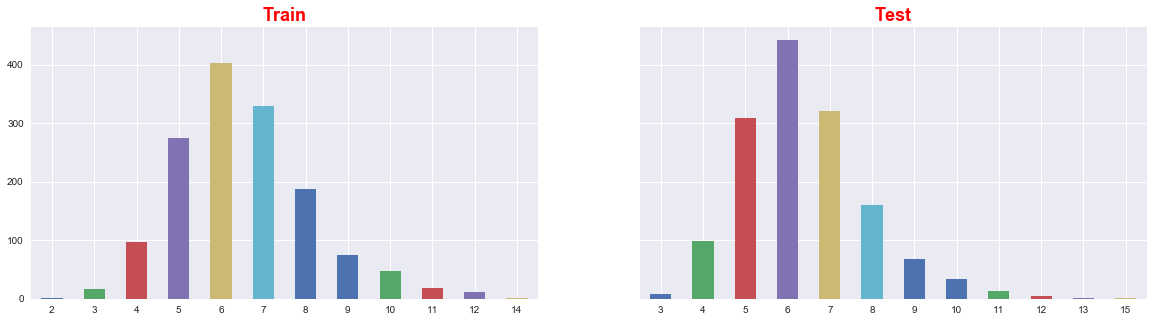

In [150]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.TotRmsAbvGrd.value_counts(dropna=False,sort=False).plot.bar(ax=ax1,rot=0)
test.TotRmsAbvGrd.value_counts(dropna=False,sort=False).plot.bar(ax=ax2,rot=0)
plt.show()

In [151]:
corr('TotRmsAbvGrd')

CORRELATION:
TotRmsAbvGrd and SalePrice: 0.53

TotRmsAbvGrd won't be taken into account


#### 56.Functional
*Home functionality (Assume typical unless deductions are warranted):*

       Typ	Typical Functionality
       Min1   Minor Deductions 1
       Min2   Minor Deductions 2
       Mod	Moderate Deductions
       Maj1   Major Deductions 1
       Maj2   Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

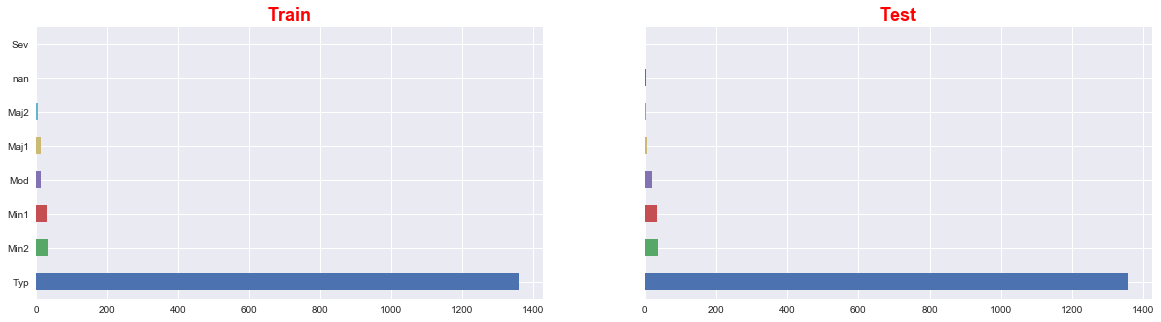

In [152]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.Functional.value_counts(dropna=False).plot.barh(ax=ax1)
test.Functional.value_counts(dropna=False).plot.barh(ax=ax2)
plt.show()

Replacing NaN values with the mode:

In [153]:
train.Functional.fillna(train.Functional.mode().iloc[0],inplace=True)
test.Functional.fillna(test.Functional.mode().iloc[0],inplace=True)

In [154]:
corr('Functional')

CORRELATION:
Functional and SalePrice: 0.12

Functional won't be taken into account


#### 57.Fireplaces
*Fireplaces: Number of fireplaces.*

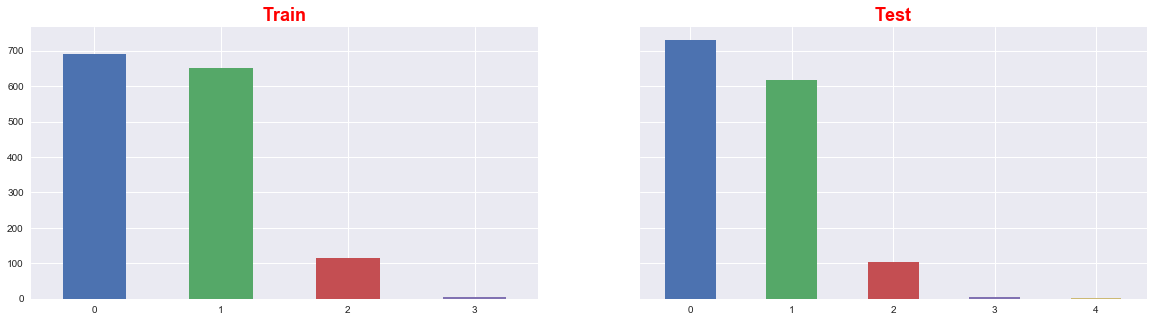

In [155]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.Fireplaces.value_counts(dropna=False,sort=False).plot.bar(ax=ax1,rot=0)
test.Fireplaces.value_counts(dropna=False,sort=False).plot.bar(ax=ax2,rot=0)
plt.show()

In [156]:
corr('Fireplaces')

CORRELATION:
Fireplaces and SalePrice: 0.47

Fireplaces won't be taken into account


#### 58.FireplaceQu
*Fireplace quality:*

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

Replacing NaN values with `NoFi`:

In [157]:
train.FireplaceQu.fillna('NoFi',inplace=True)
test.FireplaceQu.fillna('NoFi',inplace=True)

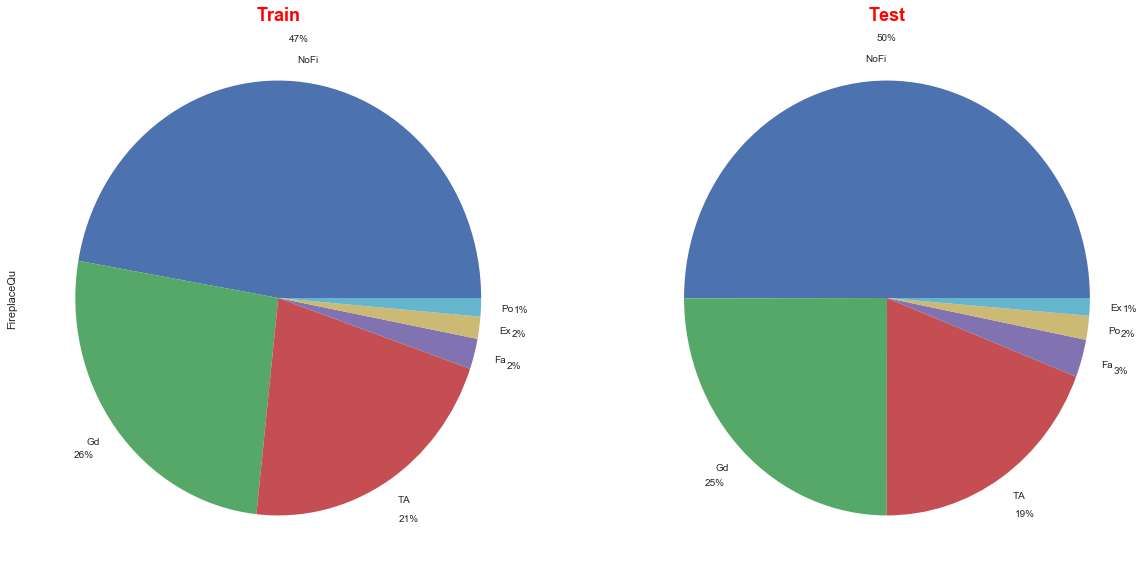

In [158]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.FireplaceQu.value_counts(dropna=False).plot.pie(ax=ax1,autopct='%1.0f%%',pctdistance=1.2)
test.FireplaceQu.value_counts(dropna=False).plot.pie(ax=ax2,autopct='%1.0f%%',pctdistance=1.2)
plt.show()

In [159]:
corr('FireplaceQu')

CORRELATION:
FireplaceQu and SalePrice: -0.1

FireplaceQu won't be taken into account


#### 59.GarageType
*Garage location:*
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment   Basement Garage
       BuiltIn   Built-In (Garage part of house - typically has room above garage)
       CarPort   Car Port
       Detchd	Detached from home
       NA        No Garage

Replacing NaN values with `NoGa`:

In [160]:
train.GarageType.fillna('NoGa',inplace=True)
test.GarageType.fillna('NoGa',inplace=True)

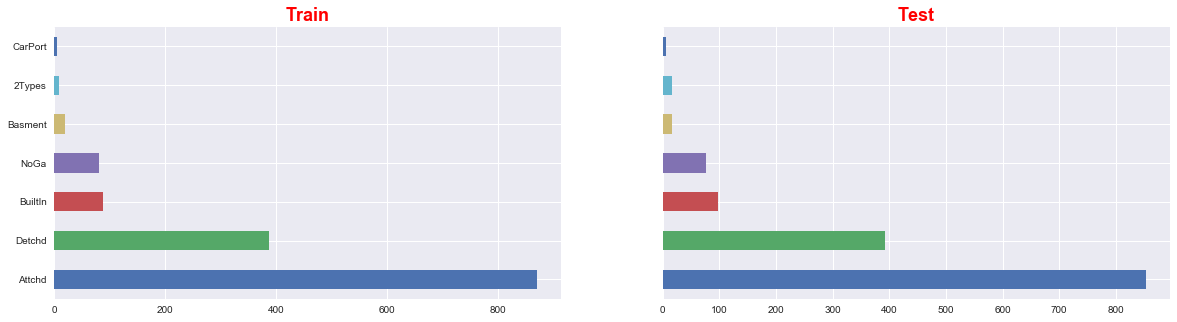

In [161]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.GarageType.value_counts(dropna=False).plot.barh(ax=ax1)
test.GarageType.value_counts(dropna=False).plot.barh(ax=ax2)
plt.show()

In [162]:
corr('GarageType')

CORRELATION:
GarageType and SalePrice: -0.42

GarageType won't be taken into account


#### 60.GarageYrBlt
*Year garage was built.*

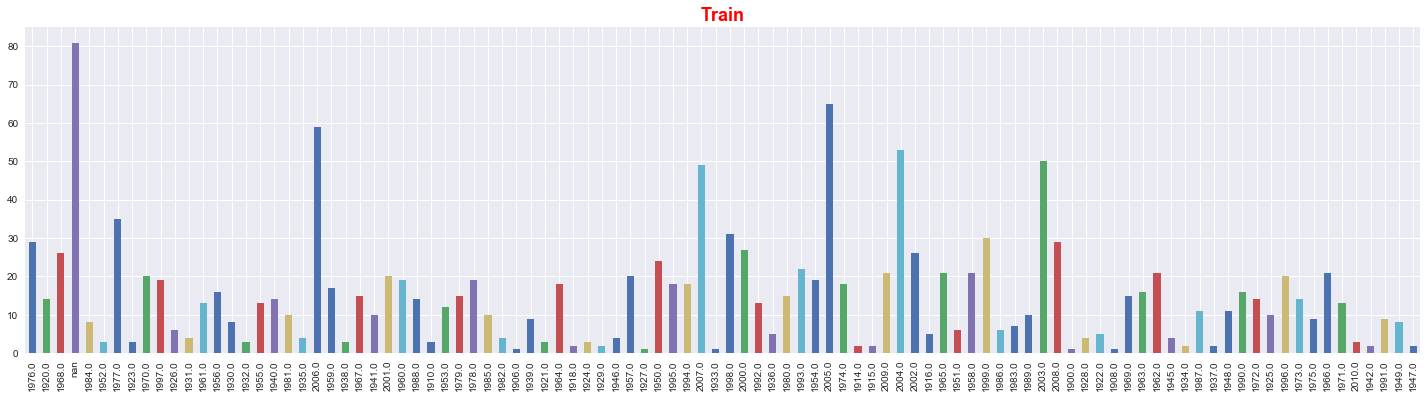

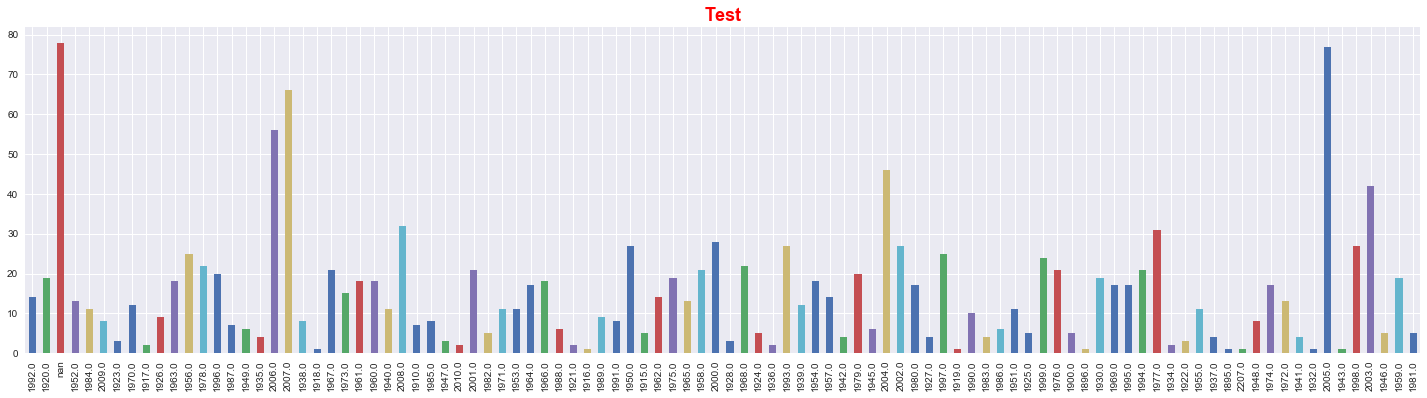

In [163]:
train.GarageYrBlt.value_counts(dropna=False,sort=False).plot(kind='bar',figsize=(25,6))
plt.title('Train',fontsize=18,color='red',fontweight="bold")
plt.show()
test.GarageYrBlt.value_counts(dropna=False,sort=False).plot(kind='bar',figsize=(25,6))
plt.title('Test',fontsize=18,color='red',fontweight="bold")
plt.show()

Replacing NaN values with the median:

In [164]:
train.GarageYrBlt.fillna(train.GarageYrBlt.median(),inplace=True)
test.GarageYrBlt.fillna(test.GarageYrBlt.median(),inplace=True)

In [165]:
corr('GarageYrBlt')

CORRELATION:
GarageYrBlt and SalePrice: 0.47

GarageYrBlt won't be taken into account


#### 61.GarageFinish
*Interior finish of the garage:*

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA     No Garage

Replacing null values with `NoGa`:

In [166]:
train.GarageFinish.fillna('NoGa',inplace=True)
test.GarageFinish.fillna('NoGa',inplace=True)

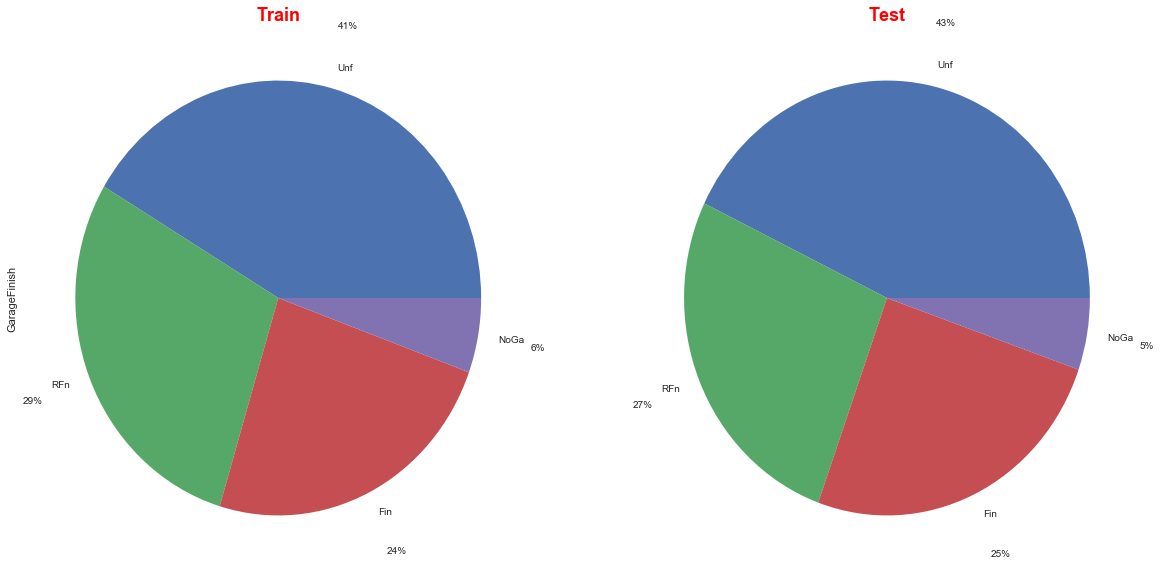

In [167]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.GarageFinish.value_counts(dropna=False).plot.pie(ax=ax1,autopct='%1.0f%%',pctdistance=1.3)
test.GarageFinish.value_counts(dropna=False).plot.pie(ax=ax2,autopct='%1.0f%%',pctdistance=1.3)
plt.show()

In [168]:
corr('GarageFinish')

CORRELATION:
GarageFinish and SalePrice: -0.43

GarageFinish won't be taken into account


#### 62.GarageCars
*Size of garage in car capacity.*

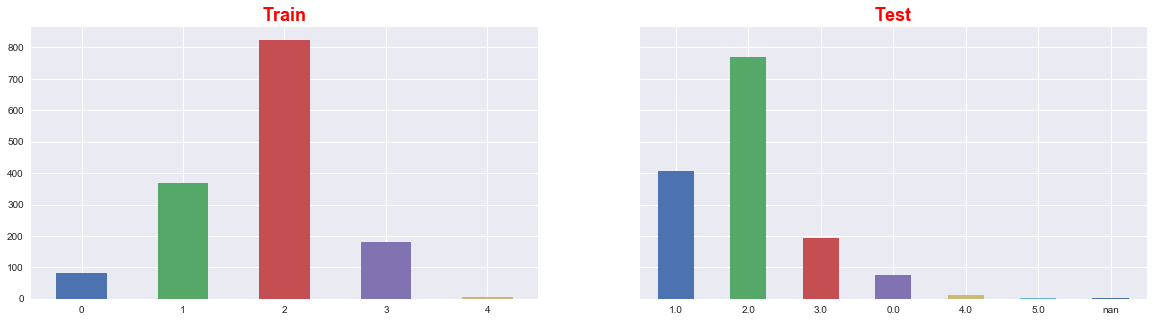

In [169]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.GarageCars.value_counts(dropna=False,sort=False).plot.bar(ax=ax1,rot=0)
test.GarageCars.value_counts(dropna=False,sort=False).plot.bar(ax=ax2,rot=0)
plt.show()

Replacing NaN values with the median:

In [170]:
train.GarageCars.fillna(train.GarageCars.median(),inplace=True)
test.GarageCars.fillna(test.GarageCars.median(),inplace=True)

In [171]:
corr('GarageCars')

CORRELATION:
GarageCars and SalePrice: 0.64

GarageCars will be taken into account!!


#### 63.GarageArea
*Size of garage in square feet.*

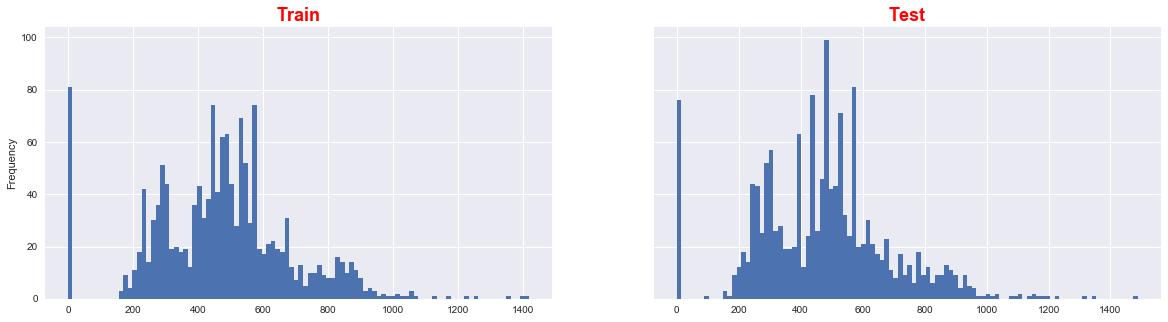

In [172]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.GarageArea.plot.hist(ax=ax1,bins=100)
test.GarageArea.plot.hist(ax=ax2,bins=100)
plt.show()

Replacing NaN values with the average value:

In [173]:
train.GarageArea.fillna(round(train.GarageArea.mean(),1),inplace=True)
test.GarageArea.fillna(round(test.GarageArea.mean(),1),inplace=True)

In [174]:
corr('GarageArea')

CORRELATION:
GarageArea and SalePrice: 0.62

GarageArea will be taken into account!!


#### 64.GarageQual
*Garage quality:*

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

Replacing null values with `NoGa`:

In [175]:
train.GarageQual.fillna('NoGa',inplace=True)
test.GarageQual.fillna('NoGa',inplace=True)

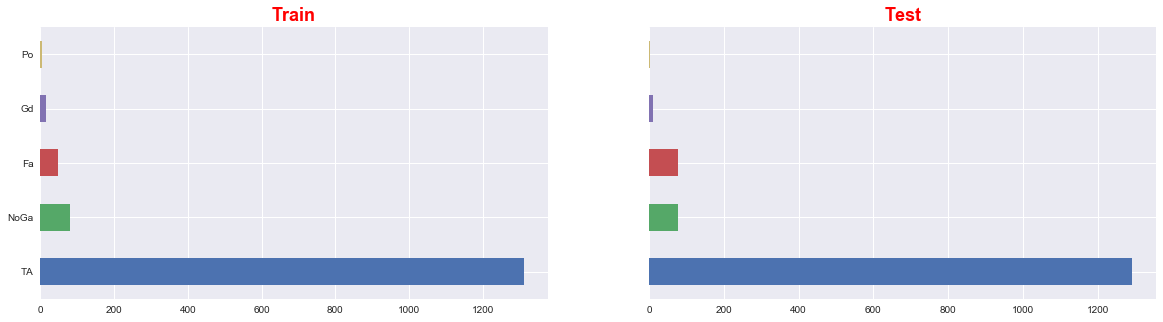

In [176]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.GarageQual.value_counts(dropna=False).plot.barh(ax=ax1)
test.GarageQual.value_counts(dropna=False).plot.barh(ax=ax2)
plt.show()

In [177]:
corr('GarageQual')

CORRELATION:
GarageQual and SalePrice: 0.21

GarageQual won't be taken into account


#### 65.GarageCond
*Garage condition:*

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

Replacing NaN values with `NoGa`:

In [178]:
train.GarageCond.fillna('NoGa',inplace=True)
test.GarageCond.fillna('NoGa',inplace=True)

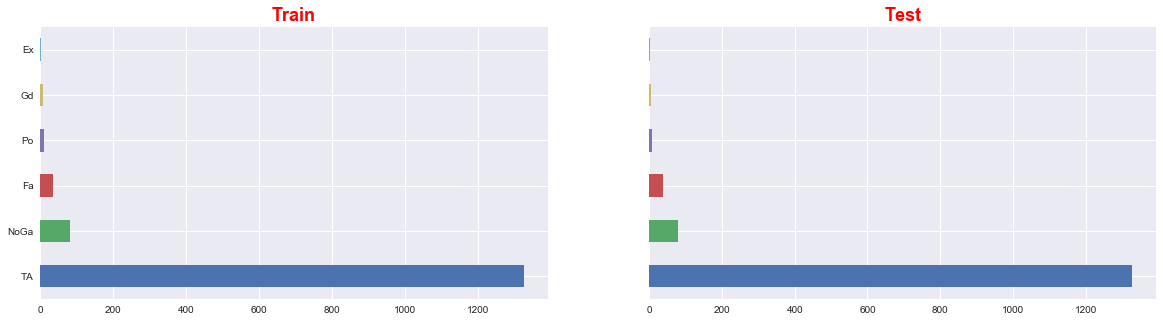

In [179]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.GarageCond.value_counts(dropna=False).plot.barh(ax=ax1)
test.GarageCond.value_counts(dropna=False).plot.barh(ax=ax2)
plt.show()

In [180]:
corr('GarageCond')

CORRELATION:
GarageCond and SalePrice: 0.25

GarageCond won't be taken into account


#### 66.PavedDrive
*Paved driveway:*

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

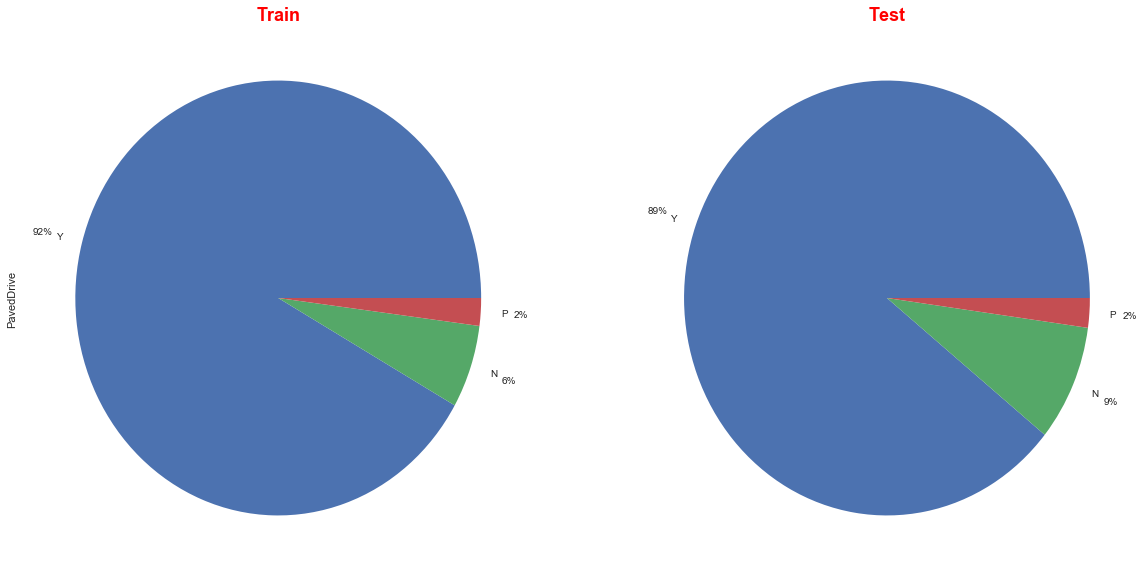

In [181]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.PavedDrive.value_counts(dropna=False).plot.pie(ax=ax1,autopct='%1.0f%%',pctdistance=1.2)
test.PavedDrive.value_counts(dropna=False).plot.pie(ax=ax2,autopct='%1.0f%%',pctdistance=1.2)
plt.show()

In [182]:
corr('PavedDrive')

CORRELATION:
PavedDrive and SalePrice: 0.23

PavedDrive won't be taken into account


#### 67.WoodDeckSF
*Wood deck area in square feet.*

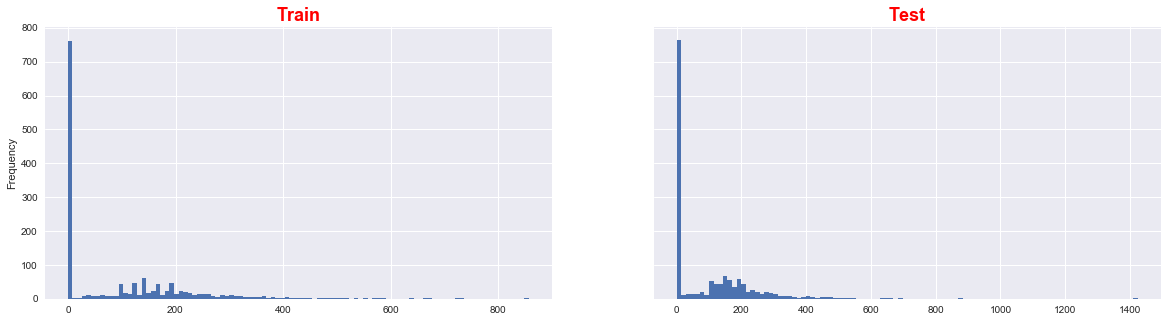

In [183]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.WoodDeckSF.plot.hist(ax=ax1,bins=100)
test.WoodDeckSF.plot.hist(ax=ax2,bins=100)
plt.show()

In [184]:
corr('WoodDeckSF')

CORRELATION:
WoodDeckSF and SalePrice: 0.32

WoodDeckSF won't be taken into account


#### 68.OpenPorchSF
*Open porch area in square feet.*

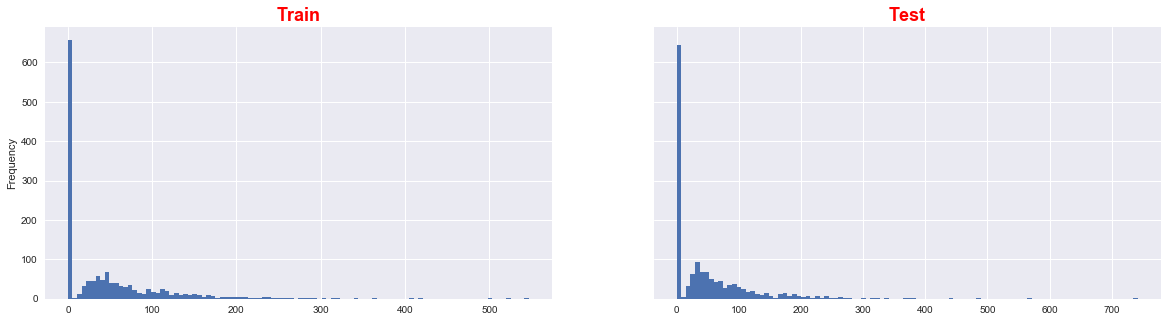

In [185]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.OpenPorchSF.plot.hist(ax=ax1,bins=100)
test.OpenPorchSF.plot.hist(ax=ax2,bins=100)
plt.show()

In [186]:
corr('OpenPorchSF')

CORRELATION:
OpenPorchSF and SalePrice: 0.32

OpenPorchSF won't be taken into account


#### 69.EnclosedPorch
*Enclosed porch area in square feet.*

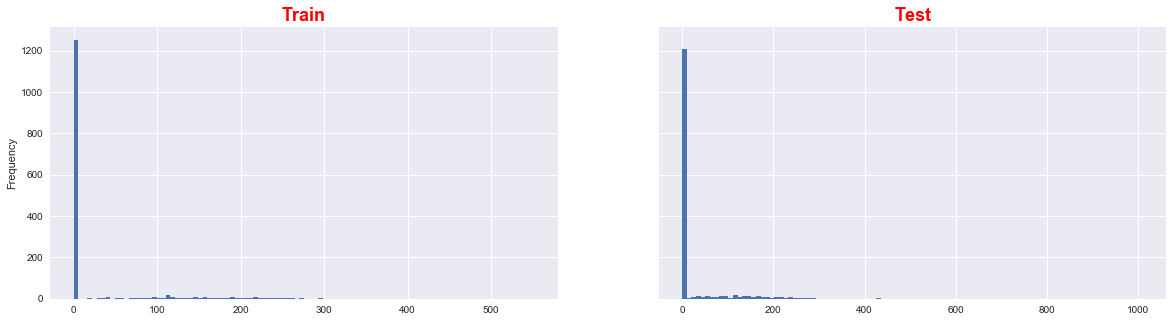

In [187]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.EnclosedPorch.plot.hist(ax=ax1,bins=100)
test.EnclosedPorch.plot.hist(ax=ax2,bins=100)
plt.show()

In [188]:
corr('EnclosedPorch')

CORRELATION:
EnclosedPorch and SalePrice: -0.13

EnclosedPorch won't be taken into account


#### 70.3SsnPorch
*Three season porch area in square feet.*

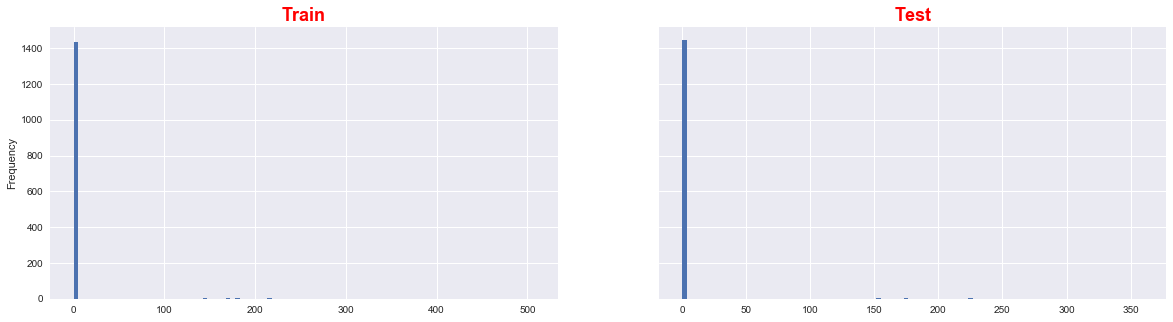

In [189]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train['3SsnPorch'].plot.hist(ax=ax1,bins=100)
test['3SsnPorch'].plot.hist(ax=ax2,bins=100)
plt.show()

In [190]:
corr('3SsnPorch')

CORRELATION:
3SsnPorch and SalePrice: 0.04

3SsnPorch won't be taken into account


#### 71.ScreenPorch
*Screen porch area in square feet.*

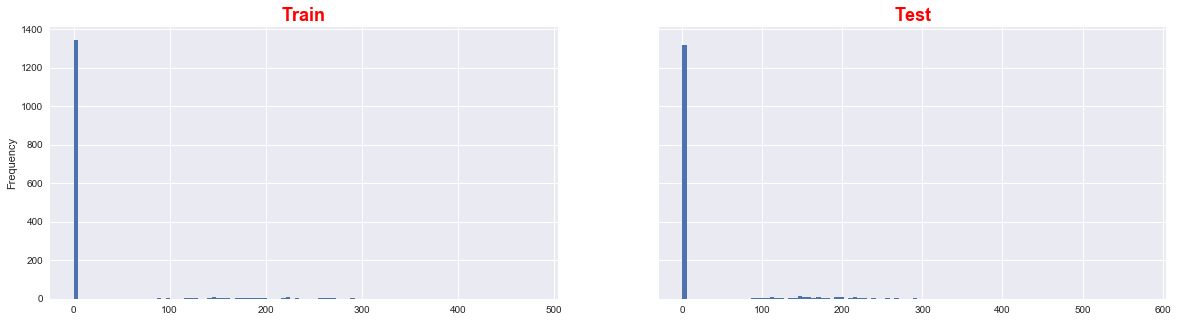

In [191]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.ScreenPorch.plot.hist(ax=ax1,bins=100)
test.ScreenPorch.plot.hist(ax=ax2,bins=100)
plt.show()

In [192]:
corr('ScreenPorch')

CORRELATION:
ScreenPorch and SalePrice: 0.11

ScreenPorch won't be taken into account


#### 72.PoolArea
*Pool area in square feet.*

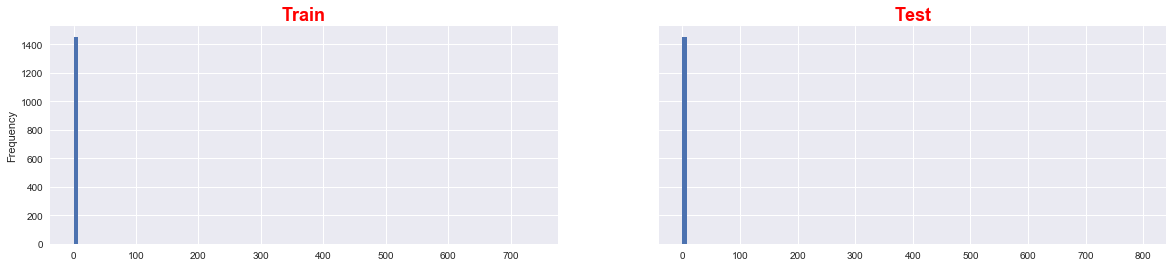

In [193]:
f = plt.figure(figsize=(20,4))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.PoolArea.plot.hist(ax=ax1,bins=100)
test.PoolArea.plot.hist(ax=ax2,bins=100)
plt.show()

In [194]:
corr('PoolArea')

CORRELATION:
PoolArea and SalePrice: 0.09

PoolArea won't be taken into account


#### 73.PoolQC
*Pool quality:*
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Replacing NaN with `NoPo`:

In [195]:
train.PoolQC.fillna('NoPo',inplace=True)
test.PoolQC.fillna('NoPo',inplace=True)

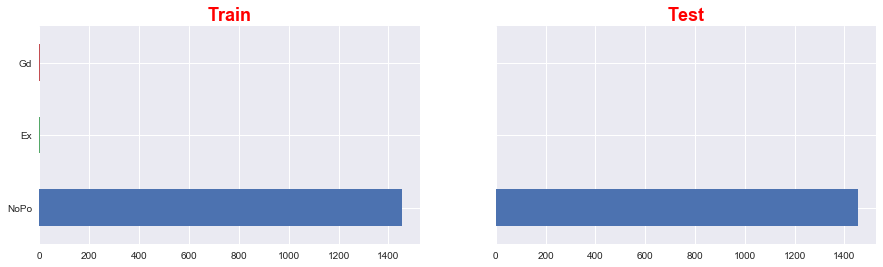

In [196]:
f = plt.figure(figsize=(15,4))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.PoolQC.value_counts(dropna=False).plot.barh(ax=ax1)
test.PoolQC.value_counts(dropna=False).plot.barh(ax=ax2)
plt.show()

In [197]:
corr('PoolQC')

CORRELATION:
PoolQC and SalePrice: -0.13

PoolQC won't be taken into account


#### 74.Fence
*Fence quality:*
		
       GdPrv    Good Privacy
       MnPrv	Minimum Privacy
       GdWo     Good Wood
       MnWw     Minimum Wood/Wire
       NA	   No Fence

Replacing NaN values with `NoFe`:

In [198]:
train.Fence.fillna('NoFe',inplace=True)
test.Fence.fillna('NoFe',inplace=True)

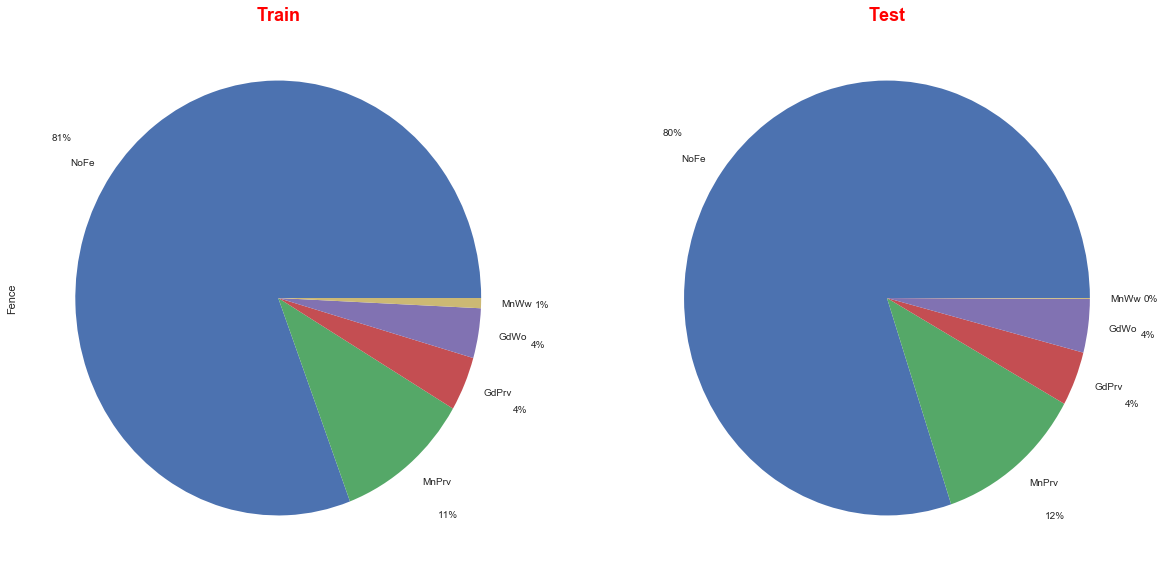

In [199]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.Fence.value_counts(dropna=False).plot.pie(ax=ax1,autopct='%1.0f%%',pctdistance=1.3)
test.Fence.value_counts(dropna=False).plot.pie(ax=ax2,autopct='%1.0f%%',pctdistance=1.3)
plt.show()

In [200]:
corr('Fence')

CORRELATION:
Fence and SalePrice: 0.14

Fence won't be taken into account


#### 75.MiscFeature
*Miscellaneous feature not covered in other categories:*
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA      None

Replacing NaN values with `None`:

In [201]:
train.MiscFeature.fillna('None',inplace=True)
test.MiscFeature.fillna('None',inplace=True)

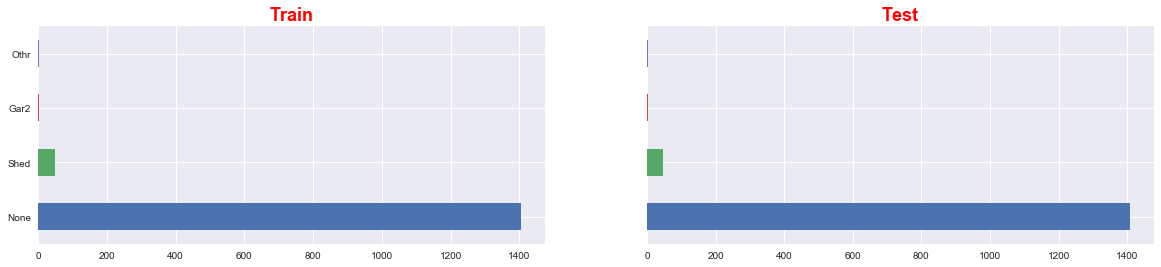

In [202]:
f = plt.figure(figsize=(20,4))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.MiscFeature.value_counts(dropna=False).plot.barh(ax=ax1)
test.MiscFeature.value_counts(dropna=False).plot.barh(ax=ax2)
plt.show()

In [203]:
corr('MiscFeature')

CORRELATION:
MiscFeature and SalePrice: -0.07

MiscFeature won't be taken into account


#### 76.MiscVal
*Value of miscellaneous feature in dollars.*

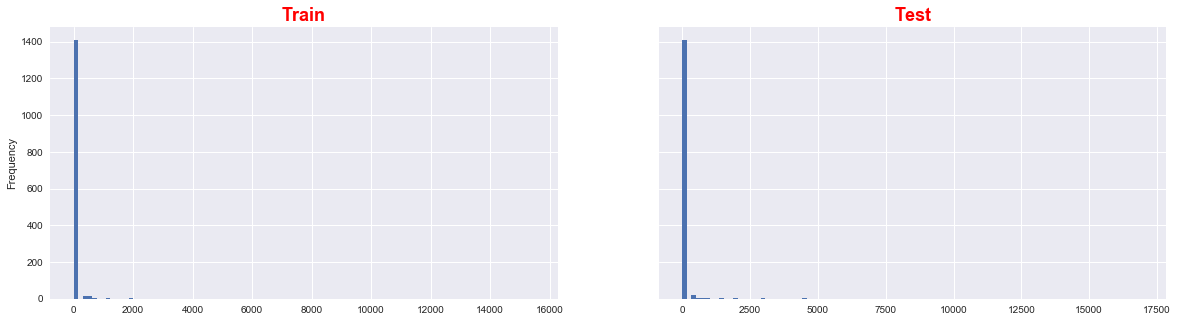

In [204]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.MiscVal.plot.hist(ax=ax1,bins=100)
test.MiscVal.plot.hist(ax=ax2,bins=100)
plt.show()

In [205]:
corr('MiscVal')

CORRELATION:
MiscVal and SalePrice: -0.02

MiscVal won't be taken into account


#### 77.MoSold
*Month Sold (MM).*

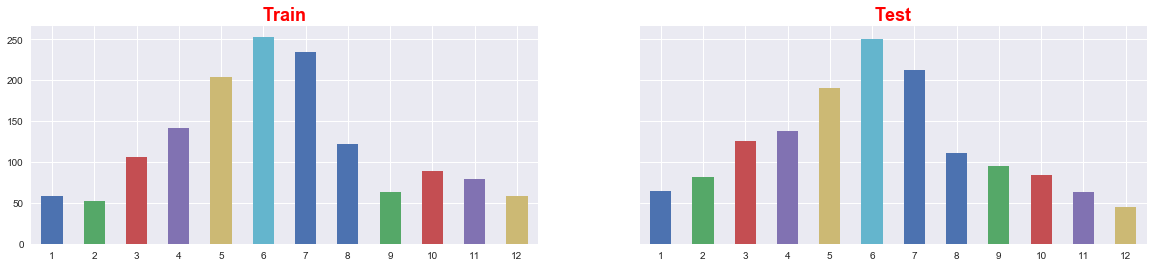

In [206]:
f = plt.figure(figsize=(20,4))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.MoSold.value_counts(dropna=False,sort=False).plot.bar(ax=ax1,rot=0)
test.MoSold.value_counts(dropna=False,sort=False).plot.bar(ax=ax2,rot=0)
plt.show()

In [207]:
corr('MoSold')

CORRELATION:
MoSold and SalePrice: 0.05

MoSold won't be taken into account


#### 78.YrSold
*Year Sold (YYYY).*

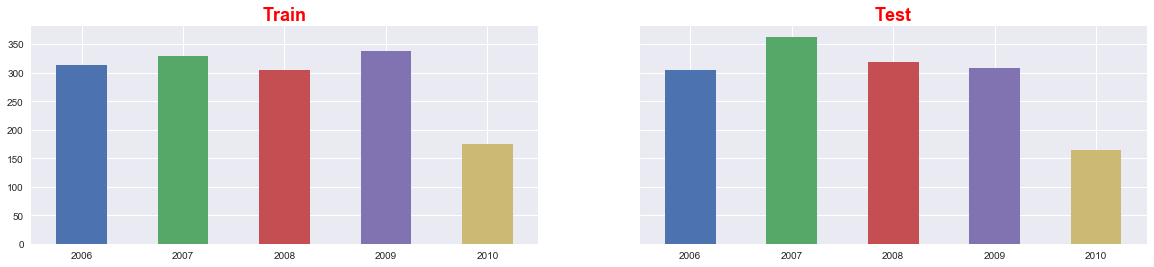

In [208]:
f = plt.figure(figsize=(20,4))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.YrSold.value_counts(dropna=False,sort=False).plot.bar(ax=ax1,rot=0)
test.YrSold.value_counts(dropna=False,sort=False).plot.bar(ax=ax2,rot=0)
plt.show()

In [209]:
corr('YrSold')

CORRELATION:
YrSold and SalePrice: -0.03

YrSold won't be taken into account


#### 79.SaleType
*Type of sale:*
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw  Contract Low Down payment and low interest
       ConLI  Contract Low Interest
       ConLD  Contract Low Down
       Oth	Other

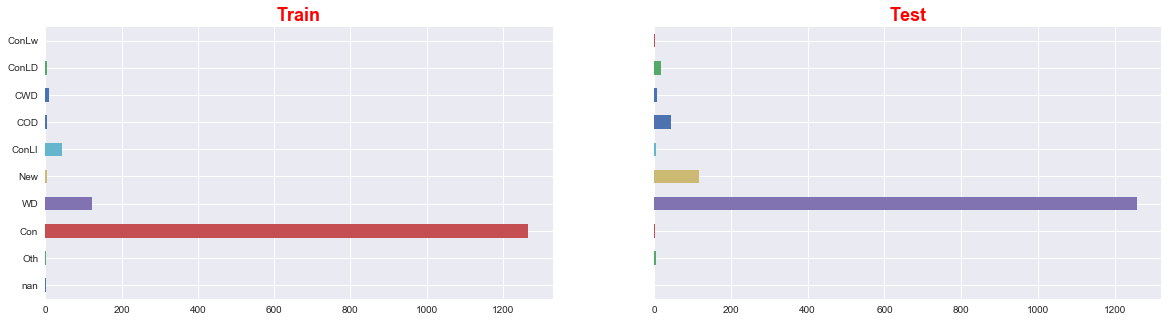

In [210]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.SaleType.value_counts(dropna=False,sort=False).plot.barh(ax=ax1)
test.SaleType.value_counts(dropna=False,sort=False).plot.barh(ax=ax2)
plt.show()

Replacing NaN values with mode:

In [211]:
train.SaleType.fillna(train.SaleType.mode().iloc[0],inplace=True)
test.SaleType.fillna(train.SaleType.mode().iloc[0],inplace=True)

In [212]:
corr('SaleType')

CORRELATION:
SaleType and SalePrice: -0.05

SaleType won't be taken into account


#### 80.SaleCondition
*Condition of sale:*

       Normal	Normal Sale
       Abnorml   Abnormal Sale -  trade, foreclosure, short sale
       AdjLand   Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial   Home was not completed when last assessed (associated with New Homes)

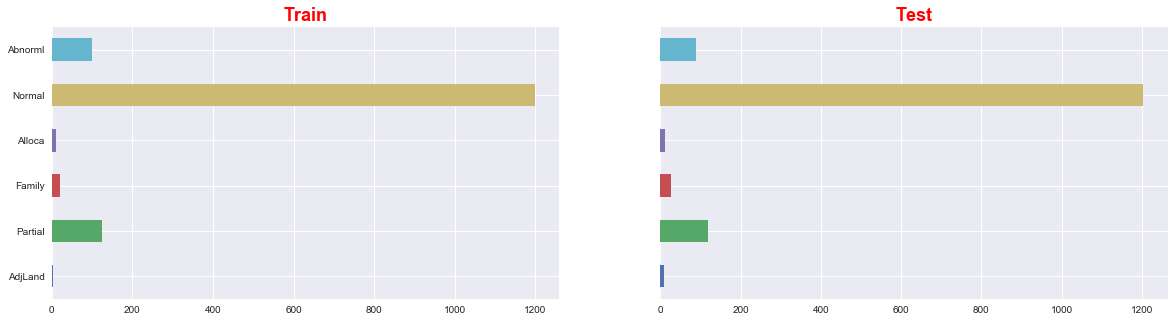

In [213]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(121)
ax1.set_title('Train', color='red',fontsize=18,fontweight="bold")
ax2 = f.add_subplot(122,sharey=ax1)
ax2.set_title('Test', color='red',fontsize=18,fontweight="bold")
train.SaleCondition.value_counts(dropna=False,sort=False).plot.barh(ax=ax1)
test.SaleCondition.value_counts(dropna=False,sort=False).plot.barh(ax=ax2)
plt.show()

In [214]:
corr('SaleCondition')

CORRELATION:
SaleCondition and SalePrice: 0.21

SaleCondition won't be taken into account


### SalePrice

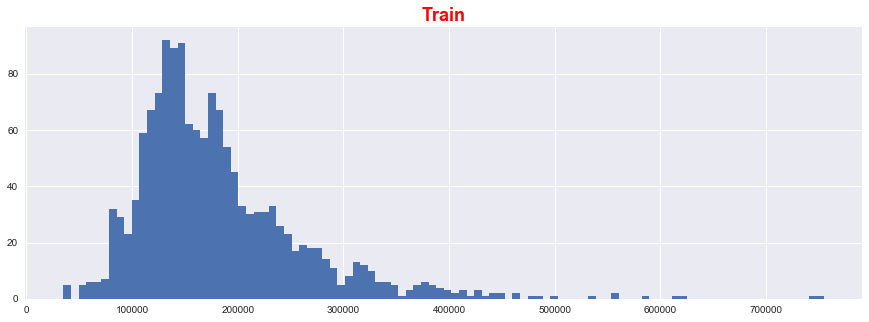

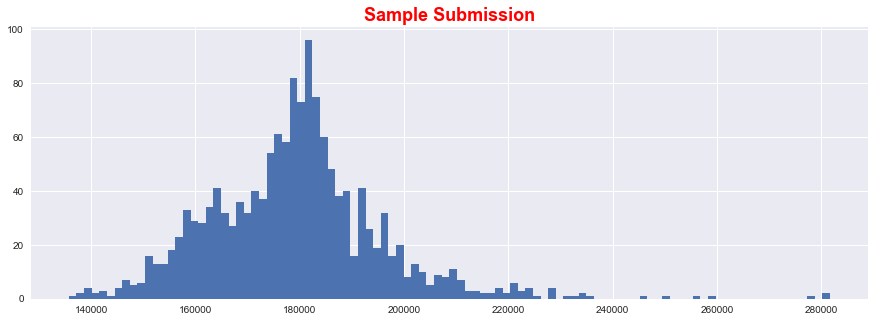

In [215]:
train.SalePrice.hist(bins=100,figsize=(15,5))
plt.title('Train',fontsize=18,color='red',fontweight="bold")
plt.show()
sample_submission.SalePrice.hist(bins=100,figsize=(15,5))
plt.title('Sample Submission',fontsize=18,color='red',fontweight="bold")
plt.show()

In [216]:
print('There are only',color.BOLD +'{} attributes'.format(len(attrs))+color.END,'to be taken for the next step')

There are only 10 attributes to be taken for the next step


Last:
- Editing `train` and `test` with the attributes selected: 

In [217]:
test=pd.DataFrame(data=test,columns=attrs)
attrs.append('SalePrice')
train=pd.DataFrame(data=train,columns=attrs)

In [218]:
train.head()

,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,GarageCars,GarageArea,SalePrice
0,7,Gd,Gd,856,856,1710,2,Gd,2,548,208500
1,6,TA,Gd,1262,1262,1262,2,TA,2,460,181500
2,7,Gd,Gd,920,920,1786,2,Gd,2,608,223500
3,7,TA,TA,756,961,1717,1,Gd,3,642,140000
4,8,Gd,Gd,1145,1145,2198,2,Gd,3,836,250000


In [219]:
test.head()

,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,GarageCars,GarageArea
0,5,TA,TA,882.0,896,896,1,TA,1.0,730.0
1,6,TA,TA,1329.0,1329,1329,1,Gd,1.0,312.0
2,5,TA,Gd,928.0,928,1629,2,TA,2.0,482.0
3,6,TA,TA,926.0,926,1604,2,Gd,2.0,470.0
4,8,Gd,Gd,1280.0,1280,1280,2,Gd,2.0,506.0


- Droping `Id` from `sample_submission`:

In [220]:
sample_submission.drop('Id',axis=1,inplace=True)

In [221]:
sample_submission.head()

,SalePrice
0,169277.052498
1,187758.393989
2,183583.683570
3,179317.477511
4,150730.079977
